# Plotting geneconcentrations through qPCR data

<div style="text-align: justify; max-width: 850px">

The significance of water as a vital resource and a heritage of humanity, as outlined in Directive 2000/60/EC of the European Parliament and the Council, underscores the need for effective wastewater treatment. On average, a person in Germany consumed 128 liters of water per day in 2019. Wastewater is transported through public sewer systems to  conventional treatment plants, where it undergoes mechanical and biochemical treatment. Due to emerging pollutants and the spread of (pathogenic) microorganisms, there is an increasing need to revolutionize wastewater treatment, as conventional treatment plants are often incapable of effectively removing these substances. This has sparked a discourse on amending the wastewater directive to mandate the implementation of a fourth, advanced treatment stage in treatment plants.

</div>

## Context of this work

<div style="text-align: justify; max-width: 850px">

The visualization and analysis of data play a central role in modern scientific research. In the context of the master's thesis "Reduction of resistance genes through wastewater treatment", a Jupyter Notebook was utilized for the analysis and visualization of data on gene concentrations quantified through qPCR from wastewater samples. In addition to considering absolute gene concentrations, the study also took into account relative concentrations, determined by normalization using 16S rRNA.The primary focus of this research was on the reduction of resistance genes in different wastewater treatment plants using various purification processes. Observing resistance genes in wastewater is significant as it allows for tracking the spread of these genes and initiating elimination measures. Preventing the spread as much as possible is crucial, as it poses a risk to both health and the environment.

January 2024, Kira Kirchhoff (B.Sc.)

</div>

***

## Table of contects

* [Plotting geneconcentrations through qPCR data](#Plotting-geneconcentrations-through-qPCR-data)
* [Context of this work](#context-of-this-work)
* [Preparations](#preparations)
    * [Import Modules](#import-modules)
    * [Create random datasets](#create-random-datasets)
* [Plotting data](#plotting-data)
    * [Brunswick](#brunswick)
        * [Genes vs. Locations](#genes-vs.-locations)
        * [Genes vs. Locations (normalized)](#genes-vs.-locations-(normalized))
    * [All three wastewater treatment plants](#All-three-wastewater-treatment-plants)
        * [Subplots for all genes](#subplots-for-all-genes)
            * [mrc-1](#mcr-1)
            * [blaNDM-1](#blandm-1)
            * [ermB](#ermb)
            * [blaTEM](#blatem)
        * [Subplots for all genes (normalized)](#subplot-for-all-genes-(normalized))
            * [mcr-1](#mcr-1)
            * [blaNDM-1](#blandm-1)
            * [ermB](#ermb)
            * [blaTEM](#blatem)
    * [MoNette](#MoNette)
        * [All Genes vs. Locations](#all-genes-vs.-locations)
        * [All Genes vs. Locations (normalized)](#all-genes-vs.-locations-(normalized))
    * [Subplots for 16S rRNA](#subplots-for-16s-rrna)
* [Log-reduction calculation](#log-reduction-calculation)    
* [Conclusion](#conclusion)        
* [References](#references)
* [License](#license)

***

## Preparations

<div style="text-align: justify; max-width: 850px">
    
The use of various Python modules as well as the reading and processing of different datasets is of central importance in this master's thesis. The careful selection of specific modules such as Pandas, NumPy, Matplotlib and Seaborn enables efficient data manipulation, mathematical calculations and the creation of meaningful visualisations. These tools are essential for processing complex datasets that come from a variety of sources and are relevant to the research question.

Integrating and analysing this data is an essential part of the work. The datasets, which are often in the form of Excel spreadsheets, are read in using Pandas and converted into DataFrames. This transformation enables flexible and effective handling of the data, which is necessary for further analyses. The use of these advanced data analysis methods forms the basis for recognising patterns and trends and for deriving scientifically sound conclusions in the context of the study.

</div>

### Import Modules

<div style="text-align: justify; max-width: 850px">

Seaborn (sns): A visualisation library that builds on Matplotlib to create appealing statistical graphics. Seaborn is used for advanced data visualisations that highlight trends and patterns in your data.

Pandas (pd): A library for data manipulation and analysis. It offers powerful data structures such as DataFrames, which are essential for reading, cleaning and analysing complex datasets.

NumPy (np): A library for scientific computing characterised by support for large, multi-dimensional arrays and a variety of mathematical functions. NumPy is used for efficient numerical calculations in your analysis.

Matplotlib.pyplot (plt): A basic library for 2D graphics in Python, used for creating basic plots and visualisations of your data.

Matplotlib.gridspec (gridspec): A plot layout specification module used for designing complex and customised graphic layouts.

</div>

In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.patches as patches

### Create random datasets

<div style="text-align: justify; max-width: 850px">

In this Jupyter Notebook, a randomly generated dataset was used to demonstrate the analysis methods, as the original data may not be published for data protection reasons. The generated dataset has the same structure and column names as the original dataset to ensure the consistency of the analysis method. The codes used to create boxplots are identical to those used to analyse the original data in the study.
    
</div>

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None) 
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_info_rows', None) 
pd.set_option('display.float_format', '{:.2f}'.format)

n_rows = 50

values = ['B-KAZ', 'B-KAA', 'B-OZA', 'B-FA', 'B-UVA', 'AVK', 'KAA', 'KGLZ', 'KGLA', 'KGLAG']
pn_stelle = np.random.choice(values, n_rows)

SAK_values = ['34', '47']
SAK = np.random.choice(SAK_values, n_rows)

MNG = pd.DataFrame({
    'PN-Stelle': np.sort(pn_stelle),
    'SAK': SAK,
    
    'mcr-1': np.random.uniform(0, 1000, n_rows),
    'blaNDM-1': np.random.uniform(0, 1000, n_rows),
    'ermB': np.random.uniform(0, 1000, n_rows),
    'blaTEM': np.random.uniform(0, 1000, n_rows),
    'tetM': np.random.uniform(0, 1000, n_rows),
    'sul1': np.random.uniform(0, 1000, n_rows),
    'blaCMY': np.random.uniform(0, 1000, n_rows),
    'blaCTX-M': np.random.uniform(0, 1000, n_rows),
    'mecA': np.random.uniform(0, 1000, n_rows),
    'vanA': np.random.uniform(0, 1000, n_rows),
    'blaKPC': np.random.uniform(0, 1000, n_rows),
    '16S rRNA': np.random.uniform(0, 1000, n_rows),
    
    'norm. mcr-1': np.random.uniform(0, 1000, n_rows),
    'norm. blaNDM-1': np.random.uniform(0, 1000, n_rows),
    'norm. ermB': np.random.uniform(0, 1000, n_rows),
    'norm. blaTEM': np.random.uniform(0, 1000, n_rows),
    'norm. tetM': np.random.uniform(0, 1000, n_rows),
    'norm. sul1': np.random.uniform(0, 1000, n_rows),
    'norm. blaCMY': np.random.uniform(0, 1000, n_rows),
    'norm. blaCTX-M': np.random.uniform(0, 1000, n_rows),
    'norm. mecA': np.random.uniform(0, 1000, n_rows),
    'norm. vanA': np.random.uniform(0, 1000, n_rows),
    'norm. blaKPC': np.random.uniform(0, 1000, n_rows),
    
    '16S rRNA': np.random.uniform(0, 1000, n_rows)
})

MNG

,PN-Stelle,SAK,mcr-1,blaNDM-1,ermB,blaTEM,tetM,sul1,blaCMY,blaCTX-M,mecA,vanA,blaKPC,16S rRNA,norm. mcr-1,norm. blaNDM-1,norm. ermB,norm. blaTEM,norm. tetM,norm. sul1,norm. blaCMY,norm. blaCTX-M,norm. mecA,norm. vanA,norm. blaKPC
0,AVK,34,570.92,727.54,294.24,338.62,848.98,362.44,368.66,820.76,850.43,353.44,141.09,407.10,991.37,320.98,603.64,305.36,866.10,38.85,467.65,713.82,49.97,468.40,261.59
1,AVK,34,42.08,762.70,429.91,62.24,585.89,94.40,193.06,800.88,922.17,764.95,496.41,412.03,72.13,69.70,79.11,718.81,67.75,398.11,841.91,2.92,953.74,933.24,27.70
2,AVK,34,669.35,935.23,143.24,110.34,734.96,496.62,722.81,196.81,374.53,967.56,479.94,692.10,320.77,69.14,420.12,820.27,1.82,567.31,178.00,817.73,547.42,925.06,147.70
3,AVK,34,939.44,956.79,510.49,483.33,463.50,694.31,108.35,869.01,540.35,758.27,151.99,581.41,235.88,809.31,776.90,159.42,296.54,714.56,802.84,398.67,668.75,574.81,526.05
4,AVK,34,221.52,818.06,436.17,323.43,630.85,180.02,697.36,543.99,185.29,388.60,823.38,503.95,361.81,905.36,284.97,943.39,844.88,227.28,474.20,683.98,879.55,188.77,726.56
5,AVK,34,663.60,600.90,844.06,246.12,479.35,421.75,373.41,728.44,338.09,743.66,946.00,260.06,316.39,35.13,164.96,364.28,893.49,164.44,601.98,604.65,527.44,275.74,335.69
6,B-FA,34,600.86,378.01,143.55,561.04,140.23,818.17,36.64,654.01,673.87,640.15,495.24,719.77,633.21,22.45,981.69,909.58,309.83,917.94,648.07,788.18,205.87,200.83,233.96
7,B-FA,47,826.25,223.43,724.52,366.48,499.23,650.45,949.13,708.00,971.33,93.92,461.85,844.38,193.62,138.25,708.95,387.18,837.16,221.50,378.32,992.10,174.69,146.95,120.34
8,B-FA,34,589.46,625.07,765.28,649.13,754.01,357.65,733.17,404.10,104.48,555.03,136.80,209.04,676.81,228.28,139.28,697.00,105.67,661.45,977.26,12.99,654.79,16.19,385.31
9,B-FA,47,431.29,742.59,814.17,840.22,365.35,235.42,705.59,497.68,11.48,673.62,955.56,433.92,576.69,7.48,498.26,365.87,577.93,57.14,461.32,281.97,329.21,492.55,242.51


In [4]:
#Colour palettes for the individual locations
pBraunschweig = [
    "#2f6b32",
    "#458749",
    "#57a85c",
    "#78ba7d",
    "#9acb9d",
    "#bcdcbe",
    "#d1e5d7",
    "#e5f0e7"
]

pGlessen = [
    "#cc6699", 
    "#d98cb3", 
    "#ecc6d8"
]

pNette = [
    "#f8c9a0", 
    "#a0cff8"
]

***

# Plotting data

## Brunswick

<div style="text-align: justify; max-width: 850px">

</div>

### Genes vs. Locations

<div style="text-align: justify; max-width: 850px">

</div>

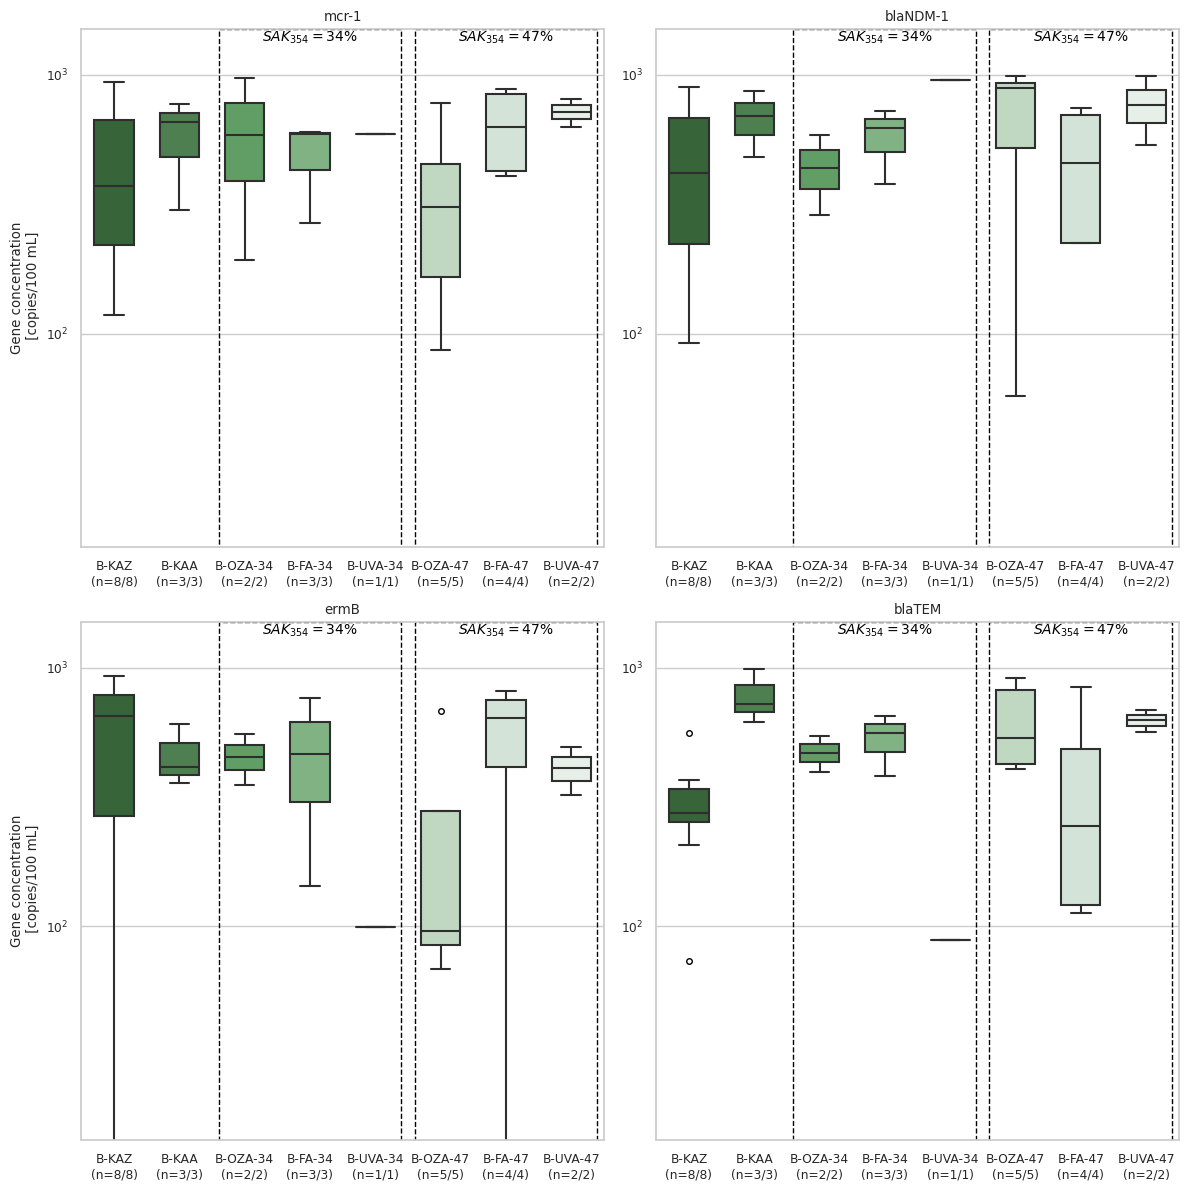

In [5]:
# List of gene names
gene_names = ['mcr-1', 'blaNDM-1', 'ermB', 'blaTEM']

# The list of desired 'PN location' values
desired_pn_stelle_values = ['B-KAZ', 'B-KAA', 'B-OZA', 'B-FA', 'B-UVA']

# Filter the DataFrame to include only the desired 'PN location' values
filtered_df = MNG[MNG['PN-Stelle'].isin(desired_pn_stelle_values)].copy()

# Add a new column for combined PN digit and SAK values
filtered_df['PN-Stelle-SAK'] = filtered_df.apply(
    lambda row: f"{row['PN-Stelle']}-{row['SAK']}" if row['PN-Stelle'] in ['B-OZA', 'B-FA', 'B-UVA'] else row['PN-Stelle'],
    axis=1
)

# Rename the PN positions
rename_map = {'B-OZA-34': 'B-OZA-34', 'B-OZA-47': 'B-OZA-47',
              'B-FA-34': 'B-FA-34', 'B-FA-47': 'B-FA-47',
              'B-UVA-34': 'B-UVA-34', 'B-UVA-47': 'B-UVA-47'}
filtered_df['PN-Stelle-SAK'] = filtered_df['PN-Stelle-SAK'].replace(rename_map)

# Restructure the filtered DataFrame into the long format
long_df = filtered_df.melt(id_vars='PN-Stelle-SAK', value_vars=gene_names, var_name='Gen', value_name='Wert')

# Convert the 'Wert' column to a numeric type
long_df['Wert'] = pd.to_numeric(long_df['Wert'], errors='coerce')

# Define the desired sequence for the box plots
order = ['B-KAZ', 'B-KAA', 'B-OZA-34', 'B-FA-34', 'B-UVA-34', 'B-OZA-47', 'B-FA-47', 'B-UVA-47']

# Convert the 'PN-Stelle-SAK' into a categorical variable with the defined sequence
long_df['PN-Stelle-SAK'] = pd.Categorical(long_df['PN-Stelle-SAK'], categories=order, ordered=True)

# Sort the DataFrame based on the categorical column
long_df.sort_values(by='PN-Stelle-SAK', inplace=True)

# Settings for the plot design
sns.set_theme(style="whitegrid", font_scale=0.8)
sns.set_palette(pBraunschweig)
flierprops = dict(marker='o', markersize=4, linestyle='None', markeredgecolor='black', markerfacecolor='white')

# Calculate the number of non-NaN values and total number of values for each combination of gene and PN location
non_nan_counts = long_df.groupby(['Gen', 'PN-Stelle-SAK'])['Wert'].count().reset_index(name='Non_NaN')
total_counts = long_df.groupby(['Gen', 'PN-Stelle-SAK']).size().reset_index(name='Total')
counts_df = pd.merge(non_nan_counts, total_counts, on=['Gen', 'PN-Stelle-SAK'])
counts_df['Ratio'] = counts_df['Non_NaN'] / counts_df['Total']

# Create subplots for each gene, side by side
fig, axes = plt.subplots(2, 2, figsize=(12, 12))
axes = axes.flatten()

y_min, y_max = 15, 1500

# Draw boxplots and adjust the x-axis labels
for i, gen in enumerate(gene_names):
    ax = axes[i]
    gen_data = long_df[long_df['Gen'] == gen]
    sns.boxplot(x='PN-Stelle-SAK', y='Wert', data=gen_data, ax=ax, flierprops=flierprops, width=0.6, order=order)
    ax.set_title(f'{gen}')
    ax.set_yscale('log')
    ax.set_ylim(y_min, y_max)
    ax.set_xlabel('')
    ax.set_ylabel('Gene concentration\n [copies/100 mL]' if i == 0 or i == 2 else '')

    # Update the x-axis labels
    new_labels = [f'{pn_stelle_sak}\n(n={counts_df[(counts_df["Gen"] == gen) & (counts_df["PN-Stelle-SAK"] == pn_stelle_sak)]["Non_NaN"].values[0]}/{counts_df[(counts_df["Gen"] == gen) & (counts_df["PN-Stelle-SAK"] == pn_stelle_sak)]["Total"].values[0]})' 
                  for pn_stelle_sak in order]
    ax.set_xticklabels(new_labels, rotation=0, ha='center')

    # Set Rectangles for SAK = 34 and SAK = 47
    rect34 = patches.Rectangle((4.6, -1), 2.8, ax.get_ylim()[1] + 1, linewidth=1, edgecolor='black', facecolor='none', linestyle='--')
    ax.add_patch(rect34)
    ax.text(3, ax.get_ylim()[1], '$\Delta SAK_{354} = 34\%$', ha='center', va='top', fontsize=10, color='black')

    rect47 = patches.Rectangle((1.6, -1), 2.8, ax.get_ylim()[1] + 1, linewidth=1, edgecolor='black', facecolor='none', linestyle='--')
    ax.add_patch(rect47)
    ax.text(6, ax.get_ylim()[1], '$\Delta SAK_{354} = 47\%$', ha='center', va='top', fontsize=10, color='black')

plt.tight_layout()
plt.show()

***

## Genes vs. Locations (normalized)

<div style="text-align: justify; max-width: 850px">

</div>

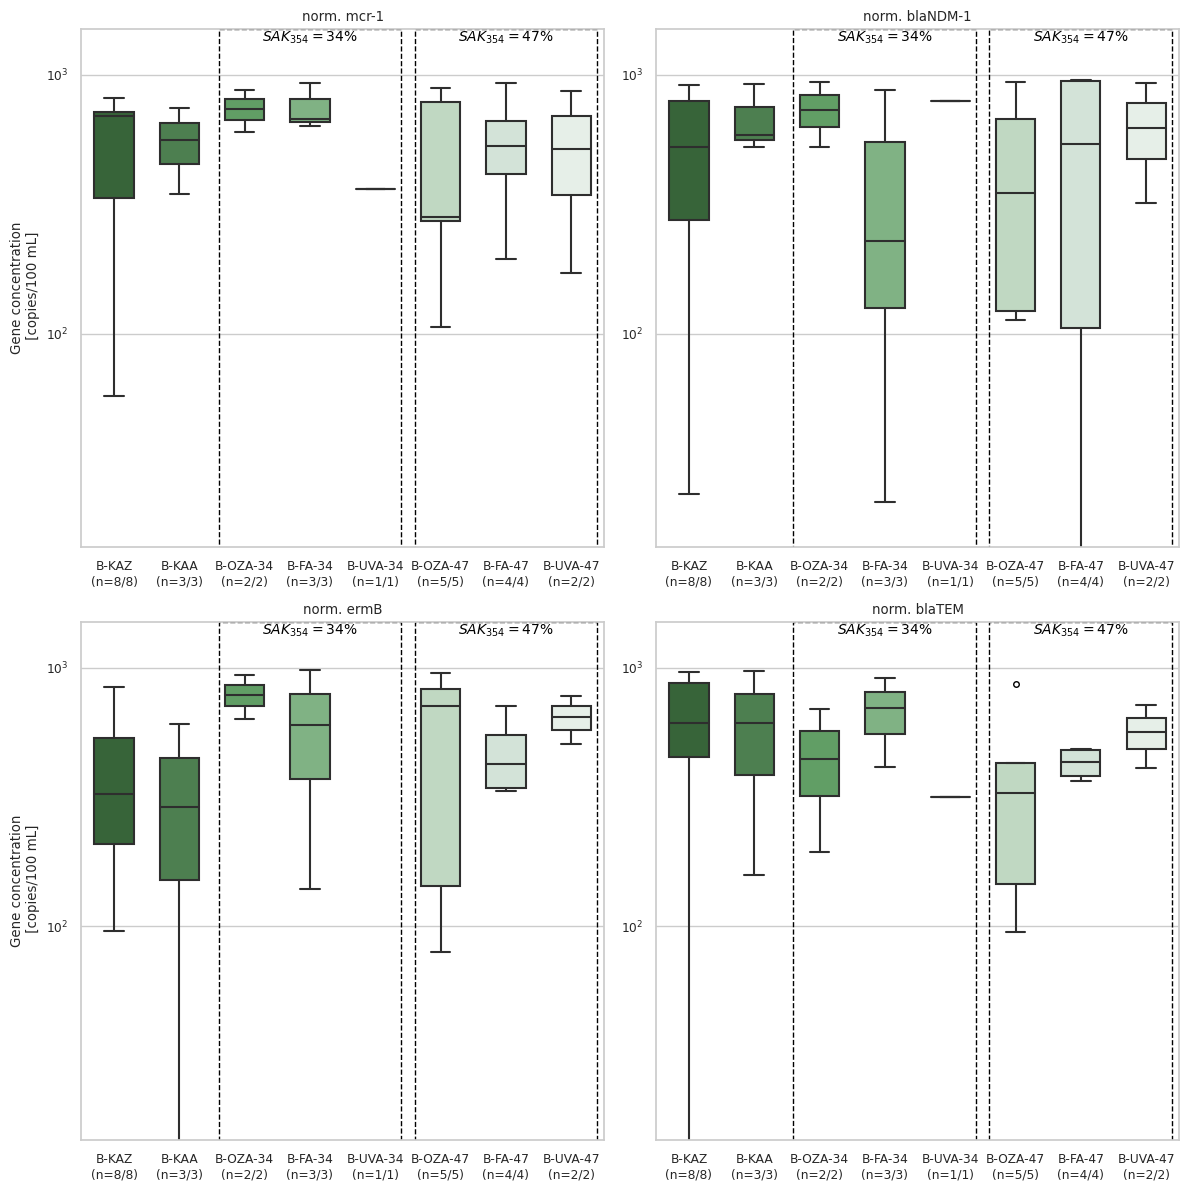

In [19]:
# List of gene names
gene_names = ['norm. mcr-1', 'norm. blaNDM-1', 'norm. ermB', 'norm. blaTEM']

# The list of desired 'PN location' values
desired_pn_stelle_values = ['B-KAZ', 'B-KAA', 'B-OZA', 'B-FA', 'B-UVA']

# Filter the DataFrame to include only the desired 'PN location' values
filtered_df = MNG[MNG['PN-Stelle'].isin(desired_pn_stelle_values)].copy()

# Add a new column for combined PN digit and SAK values
filtered_df['PN-Stelle-SAK'] = filtered_df.apply(
    lambda row: f"{row['PN-Stelle']}-{row['SAK']}" if row['PN-Stelle'] in ['B-OZA', 'B-FA', 'B-UVA'] else row['PN-Stelle'],
    axis=1
)

# Rename the PN positions
rename_map = {'B-OZA-34': 'B-OZA-34', 'B-OZA-47': 'B-OZA-47',
              'B-FA-34': 'B-FA-34', 'B-FA-47': 'B-FA-47',
              'B-UVA-34': 'B-UVA-34', 'B-UVA-47': 'B-UVA-47'}
filtered_df['PN-Stelle-SAK'] = filtered_df['PN-Stelle-SAK'].replace(rename_map)

# Restructure the filtered DataFrame into the long format
long_df = filtered_df.melt(id_vars='PN-Stelle-SAK', value_vars=gene_names, var_name='Gen', value_name='Wert')

# Convert the 'Wert' column to a numeric type
long_df['Wert'] = pd.to_numeric(long_df['Wert'], errors='coerce')

# Define the desired sequence for the box plots
order = ['B-KAZ', 'B-KAA', 'B-OZA-34', 'B-FA-34', 'B-UVA-34', 'B-OZA-47', 'B-FA-47', 'B-UVA-47']

# Convert the 'PN-Stelle-SAK' into a categorical variable with the defined sequence
long_df['PN-Stelle-SAK'] = pd.Categorical(long_df['PN-Stelle-SAK'], categories=order, ordered=True)

# Sort the DataFrame based on the categorical column
long_df.sort_values(by='PN-Stelle-SAK', inplace=True)

# Settings for the plot design
sns.set_theme(style="whitegrid", font_scale=0.8)
sns.set_palette(pBraunschweig)
flierprops = dict(marker='o', markersize=4, linestyle='None', markeredgecolor='black', markerfacecolor='white')

# Calculate the number of non-NaN values and total number of values for each combination of gene and PN location
non_nan_counts = long_df.groupby(['Gen', 'PN-Stelle-SAK'])['Wert'].count().reset_index(name='Non_NaN')
total_counts = long_df.groupby(['Gen', 'PN-Stelle-SAK']).size().reset_index(name='Total')
counts_df = pd.merge(non_nan_counts, total_counts, on=['Gen', 'PN-Stelle-SAK'])
counts_df['Ratio'] = counts_df['Non_NaN'] / counts_df['Total']

# Create subplots for each gene, side by side
fig, axes = plt.subplots(2, 2, figsize=(12, 12))
axes = axes.flatten()

y_min, y_max = 15, 1500

# Draw boxplots and adjust the x-axis labels
for i, gen in enumerate(gene_names):
    ax = axes[i]
    gen_data = long_df[long_df['Gen'] == gen]
    sns.boxplot(x='PN-Stelle-SAK', y='Wert', data=gen_data, ax=ax, flierprops=flierprops, width=0.6, order=order)
    ax.set_title(f'{gen}')
    ax.set_yscale('log')
    ax.set_ylim(y_min, y_max)
    ax.set_xlabel('')
    ax.set_ylabel('Gene concentration\n [copies/100 mL]' if i == 0 or i == 2 else '')

    # Update the x-axis labels
    new_labels = [f'{pn_stelle_sak}\n(n={counts_df[(counts_df["Gen"] == gen) & (counts_df["PN-Stelle-SAK"] == pn_stelle_sak)]["Non_NaN"].values[0]}/{counts_df[(counts_df["Gen"] == gen) & (counts_df["PN-Stelle-SAK"] == pn_stelle_sak)]["Total"].values[0]})' 
                  for pn_stelle_sak in order]
    ax.set_xticklabels(new_labels, rotation=0, ha='center')

    # Set Rectangles for SAK = 34 and SAK = 47
    rect34 = patches.Rectangle((4.6, -1), 2.8, ax.get_ylim()[1] + 1, linewidth=1, edgecolor='black', facecolor='none', linestyle='--')
    ax.add_patch(rect34)
    ax.text(3, ax.get_ylim()[1], '$\Delta SAK_{354} = 34\%$', ha='center', va='top', fontsize=10, color='black')

    rect47 = patches.Rectangle((1.6, -1), 2.8, ax.get_ylim()[1] + 1, linewidth=1, edgecolor='black', facecolor='none', linestyle='--')
    ax.add_patch(rect47)
    ax.text(6, ax.get_ylim()[1], '$\Delta SAK_{354} = 47\%$', ha='center', va='top', fontsize=10, color='black')

plt.tight_layout()
plt.show()

***

# MoNette

<div style="text-align: justify; max-width: 850px">

</div>

## Subplots for all genes

<div style="text-align: justify; max-width: 850px">

</div>

## mcr-1

<div style="text-align: justify; max-width: 850px">

</div>

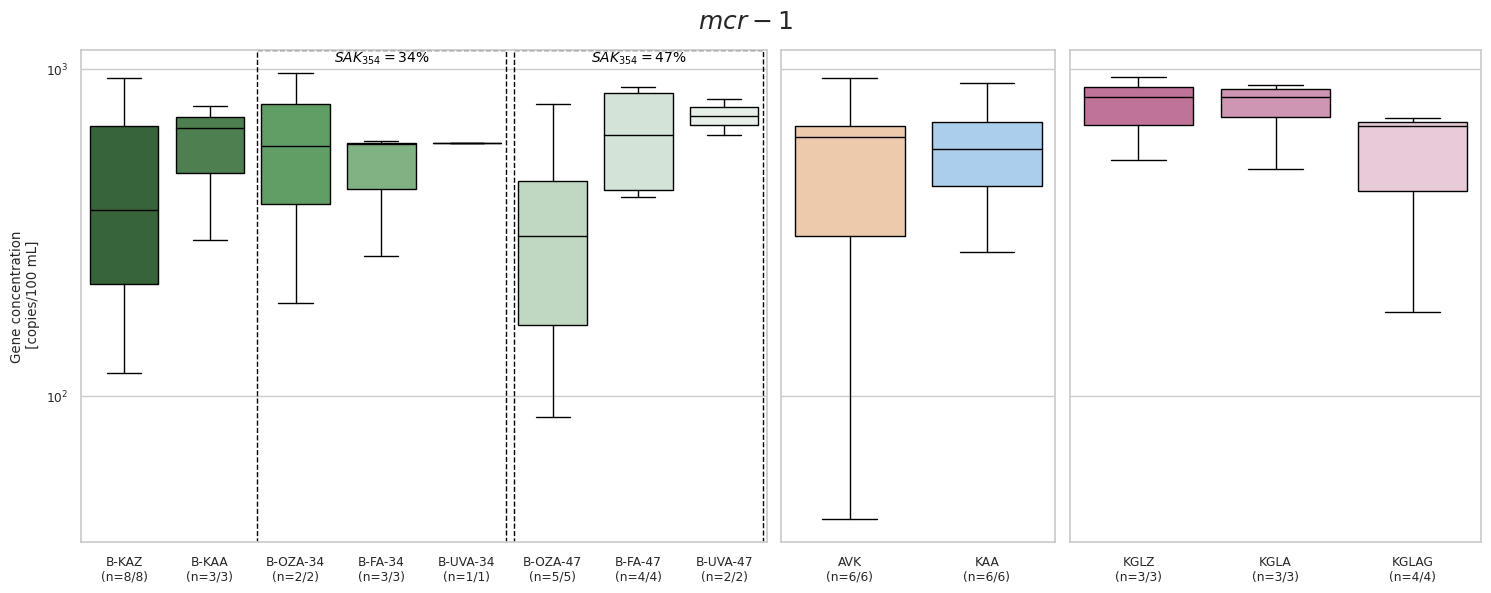

In [7]:
selected_gene = 'mcr-1'

# Groups and their order
groups = {
    'b1-b5': ['B-KAZ', 'B-KAA', 'B-OZA', 'B-FA', 'B-UVA'],
    'VKK-AKK': ['AVK', 'KAA'],
    'GL1-GL5': ['KGLZ', 'KGLA', 'KGLAG']
}

# Colour palettes
palettes = [pBraunschweig, pNette, pGlessen]

# Calculation of the number of non-NaN values and total number of values for each PN location
non_nan_counts = MNG.groupby('PN-Stelle')[selected_gene].count()
total_counts = MNG.groupby('PN-Stelle')[selected_gene].size()

fig = plt.figure(figsize=(15, 6))
gs = gridspec.GridSpec(1, len(groups), width_ratios=[len(group) for group in groups.values()])

# Settings for the plot design
ax1 = fig.add_subplot(gs[0])
axes = [ax1] + [fig.add_subplot(gs[i], sharey=ax1) for i in range(1, len(groups))]

order_first_subplot = ['B-KAZ', 'B-KAA', 'B-OZA-34', 'B-FA-34', 'B-UVA-34', 'B-OZA-47', 'B-FA-47', 'B-UVA-47']

for ax, (title, group), palette in zip(axes, groups.items(), palettes):
    # Filter the data for the current subplot
    filtered_df = MNG[MNG['PN-Stelle'].isin(group)].copy()
    
    # Split 'B-OZA', 'B-FA', and 'B-UVA' by SAK values
    if any(pn in group for pn in ['B-OZA', 'B-FA', 'B-UVA']):
        filtered_df['PN-Stelle-SAK'] = filtered_df.apply(
            lambda row: f"{row['PN-Stelle']}-{row['SAK']}" if row['PN-Stelle'] in ['B-OZA', 'B-FA', 'B-UVA'] else row['PN-Stelle'], 
            axis=1
        )
        # Calculate the number of non-NaN values and total number of values for each PN location-SAK combination
        non_nan_counts_sak = filtered_df.groupby('PN-Stelle-SAK')[selected_gene].count()
        total_counts_sak = filtered_df.groupby('PN-Stelle-SAK')[selected_gene].size()

        # Generate a unique order for plotting
        unique_pn_stelles = []
        for pn_stelle in group:
            if pn_stelle in ['B-OZA', 'B-FA', 'B-UVA']:
                unique_pn_stelles.extend([f"{pn_stelle}-34", f"{pn_stelle}-47"])
            else:
                unique_pn_stelles.append(pn_stelle)
                
        if ax == ax1:
            sns.boxplot(
                x='PN-Stelle-SAK', 
                y=selected_gene, 
                data=filtered_df, 
                ax=ax, 
                palette=palette, 
                order=order_first_subplot,
                flierprops=dict(marker='o', markersize=4, linestyle='None', markeredgecolor='black', markerfacecolor='white'),
                boxprops=dict(edgecolor="black", linewidth=1),
                whiskerprops=dict(color="black", linewidth=1),
                capprops=dict(color="black", linewidth=1),
                medianprops=dict(color="black", linewidth=1)
            )
            new_labels = [f'{pn_stelle_sak}\n(n={non_nan_counts_sak.get(pn_stelle_sak, 0)}/{total_counts_sak.get(pn_stelle_sak, 0)})' for pn_stelle_sak in order_first_subplot]
        else:
            sns.boxplot(
                x='PN-Stelle-SAK', 
                y=selected_gene, 
                data=filtered_df, 
                ax=ax, 
                palette=palette, 
                order=unique_pn_stelles,
                flierprops=dict(marker='o', markersize=4, linestyle='None', markeredgecolor='black', markerfacecolor='white'),
                boxprops=dict(edgecolor="black", linewidth=1),
                whiskerprops=dict(color="black", linewidth=1),
                capprops=dict(color="black", linewidth=1),
                medianprops=dict(color="black", linewidth=1)
            )
            new_labels = [f'{pn_stelle_sak}\n(n={non_nan_counts_sak.get(pn_stelle_sak, 0)}/{total_counts_sak.get(pn_stelle_sak, 0)})' for pn_stelle_sak in unique_pn_stelles]
    else:
        sns.boxplot(
            x='PN-Stelle', 
            y=selected_gene, 
            data=filtered_df, 
            ax=ax, 
            palette=palette,
            flierprops=dict(marker='o', markersize=4, linestyle='None', markeredgecolor='black', markerfacecolor='white'),
            boxprops=dict(edgecolor="black", linewidth=1),
            whiskerprops=dict(color="black", linewidth=1),
            capprops=dict(color="black", linewidth=1),
            medianprops=dict(color="black", linewidth=1)
        )
        new_labels = [f'{pn_stelle}\n(n={non_nan_counts.get(pn_stelle, 0)}/{total_counts.get(pn_stelle, 0)})' for pn_stelle in group]

    ax.set_xticklabels(new_labels, rotation=0)
    ax.set_xlabel('')
    ax.set_ylabel('Gene concentration\n [copies/100 mL]' if ax is axes[0] else '')
    ax.set_yscale('log')

    if ax != axes[0]:
        plt.setp(ax.get_yticklabels(), visible=False)
        ax.set_ylabel('')
        
# Add the second rectangle to the first subplot (ax1)      
rect34 = patches.Rectangle((4.55, -1), 2.9, ax1.get_ylim()[1] + 1, linewidth=1, edgecolor='black', facecolor='none', linestyle='--')
ax1.add_patch(rect34)
ax1.text(3, ax1.get_ylim()[1], '$\Delta SAK_{354} = 34\%$', ha='center', va='top', fontsize=10, color='black')

rect47 = patches.Rectangle((1.55, -1), 2.9, ax1.get_ylim()[1] + 1, linewidth=1, edgecolor='black', facecolor='none', linestyle='--')
ax1.add_patch(rect47)
ax1.text(6, ax1.get_ylim()[1], '$\Delta SAK_{354} = 47\%$', ha='center', va='top', fontsize=10, color='black')
     
# Customise the layout
fig.suptitle(r'$\it{mcr-1}$', fontsize=18)
plt.tight_layout()
plt.show()

***

## $bla_{NDM-1}$

<div style="text-align: justify; max-width: 850px">

</div>

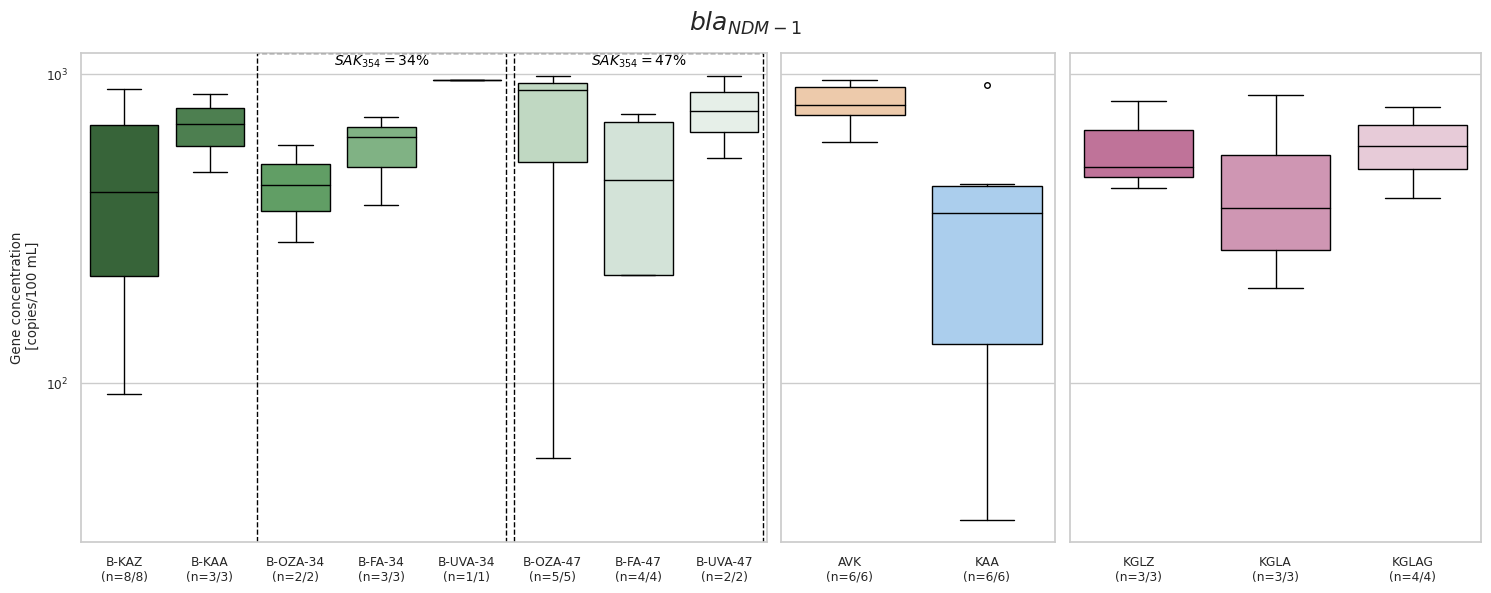

In [8]:
selected_gene = 'blaNDM-1'

groups = {
    'b1-b5': ['B-KAZ', 'B-KAA', 'B-OZA', 'B-FA', 'B-UVA'],
    'VKK-AKK': ['AVK', 'KAA'],
    'GL1-GL5': ['KGLZ', 'KGLA', 'KGLAG']
}

palettes = [pBraunschweig, pNette, pGlessen]

# Calculation of the number of non-NaN values and total number of values for each PN location
non_nan_counts = MNG.groupby('PN-Stelle')[selected_gene].count()
total_counts = MNG.groupby('PN-Stelle')[selected_gene].size()

fig = plt.figure(figsize=(15, 6))
gs = gridspec.GridSpec(1, len(groups), width_ratios=[len(group) for group in groups.values()])

# Settings for the plot design
ax1 = fig.add_subplot(gs[0])
axes = [ax1] + [fig.add_subplot(gs[i], sharey=ax1) for i in range(1, len(groups))]

order_first_subplot = ['B-KAZ', 'B-KAA', 'B-OZA-34', 'B-FA-34', 'B-UVA-34', 'B-OZA-47', 'B-FA-47', 'B-UVA-47']

for ax, (title, group), palette in zip(axes, groups.items(), palettes):
    # Filter the data for the current subplot
    filtered_df = MNG[MNG['PN-Stelle'].isin(group)].copy()
    
    # Split 'B-OZA', 'B-FA', and 'B-UVA' by SAK values
    if any(pn in group for pn in ['B-OZA', 'B-FA', 'B-UVA']):
        filtered_df['PN-Stelle-SAK'] = filtered_df.apply(
            lambda row: f"{row['PN-Stelle']}-{row['SAK']}" if row['PN-Stelle'] in ['B-OZA', 'B-FA', 'B-UVA'] else row['PN-Stelle'], 
            axis=1
        )
        # Calculate the number of non-NaN values and total number of values for each PN location-SAK combination
        non_nan_counts_sak = filtered_df.groupby('PN-Stelle-SAK')[selected_gene].count()
        total_counts_sak = filtered_df.groupby('PN-Stelle-SAK')[selected_gene].size()

        # Generate a unique order for plotting
        unique_pn_stelles = []
        for pn_stelle in group:
            if pn_stelle in ['B-OZA', 'B-FA', 'B-UVA']:
                unique_pn_stelles.extend([f"{pn_stelle}-34", f"{pn_stelle}-47"])
            else:
                unique_pn_stelles.append(pn_stelle)
                
        if ax == ax1:
            sns.boxplot(
                x='PN-Stelle-SAK', 
                y=selected_gene, 
                data=filtered_df, 
                ax=ax, 
                palette=palette, 
                order=order_first_subplot,
                flierprops=dict(marker='o', markersize=4, linestyle='None', markeredgecolor='black', markerfacecolor='white'),
                boxprops=dict(edgecolor="black", linewidth=1),
                whiskerprops=dict(color="black", linewidth=1),
                capprops=dict(color="black", linewidth=1),
                medianprops=dict(color="black", linewidth=1)
            )
            new_labels = [f'{pn_stelle_sak}\n(n={non_nan_counts_sak.get(pn_stelle_sak, 0)}/{total_counts_sak.get(pn_stelle_sak, 0)})' for pn_stelle_sak in order_first_subplot]
        else:
            sns.boxplot(
                x='PN-Stelle-SAK', 
                y=selected_gene, 
                data=filtered_df, 
                ax=ax, 
                palette=palette, 
                order=unique_pn_stelles,
                flierprops=dict(marker='o', markersize=4, linestyle='None', markeredgecolor='black', markerfacecolor='white'),
                boxprops=dict(edgecolor="black", linewidth=1),
                whiskerprops=dict(color="black", linewidth=1),
                capprops=dict(color="black", linewidth=1),
                medianprops=dict(color="black", linewidth=1)
            )
            new_labels = [f'{pn_stelle_sak}\n(n={non_nan_counts_sak.get(pn_stelle_sak, 0)}/{total_counts_sak.get(pn_stelle_sak, 0)})' for pn_stelle_sak in unique_pn_stelles]
    else:
        sns.boxplot(
            x='PN-Stelle', 
            y=selected_gene, 
            data=filtered_df, 
            ax=ax, 
            palette=palette,
            flierprops=dict(marker='o', markersize=4, linestyle='None', markeredgecolor='black', markerfacecolor='white'),
            boxprops=dict(edgecolor="black", linewidth=1),
            whiskerprops=dict(color="black", linewidth=1),
            capprops=dict(color="black", linewidth=1),
            medianprops=dict(color="black", linewidth=1)
        )
        new_labels = [f'{pn_stelle}\n(n={non_nan_counts.get(pn_stelle, 0)}/{total_counts.get(pn_stelle, 0)})' for pn_stelle in group]

    ax.set_xticklabels(new_labels, rotation=0)
    ax.set_xlabel('')
    ax.set_ylabel('Gene concentration\n [copies/100 mL]' if ax is axes[0] else '')
    ax.set_yscale('log')

    if ax != axes[0]:
        plt.setp(ax.get_yticklabels(), visible=False)
        ax.set_ylabel('')
        
# Add the second rectangle to the first subplot (ax1)      
rect34 = patches.Rectangle((4.55, -1), 2.9, ax1.get_ylim()[1] + 1, linewidth=1, edgecolor='black', facecolor='none', linestyle='--')
ax1.add_patch(rect34)
ax1.text(3, ax1.get_ylim()[1], '$\Delta SAK_{354} = 34\%$', ha='center', va='top', fontsize=10, color='black')

rect47 = patches.Rectangle((1.55, -1), 2.9, ax1.get_ylim()[1] + 1, linewidth=1, edgecolor='black', facecolor='none', linestyle='--')
ax1.add_patch(rect47)
ax1.text(6, ax1.get_ylim()[1], '$\Delta SAK_{354} = 47\%$', ha='center', va='top', fontsize=10, color='black')

fig.suptitle(r'$\bf{\it{bla}_{\it{NDM-1}}}$', fontsize=18)
plt.tight_layout()
plt.show()

***

## $ermB$

<div style="text-align: justify; max-width: 850px">
    
</div>

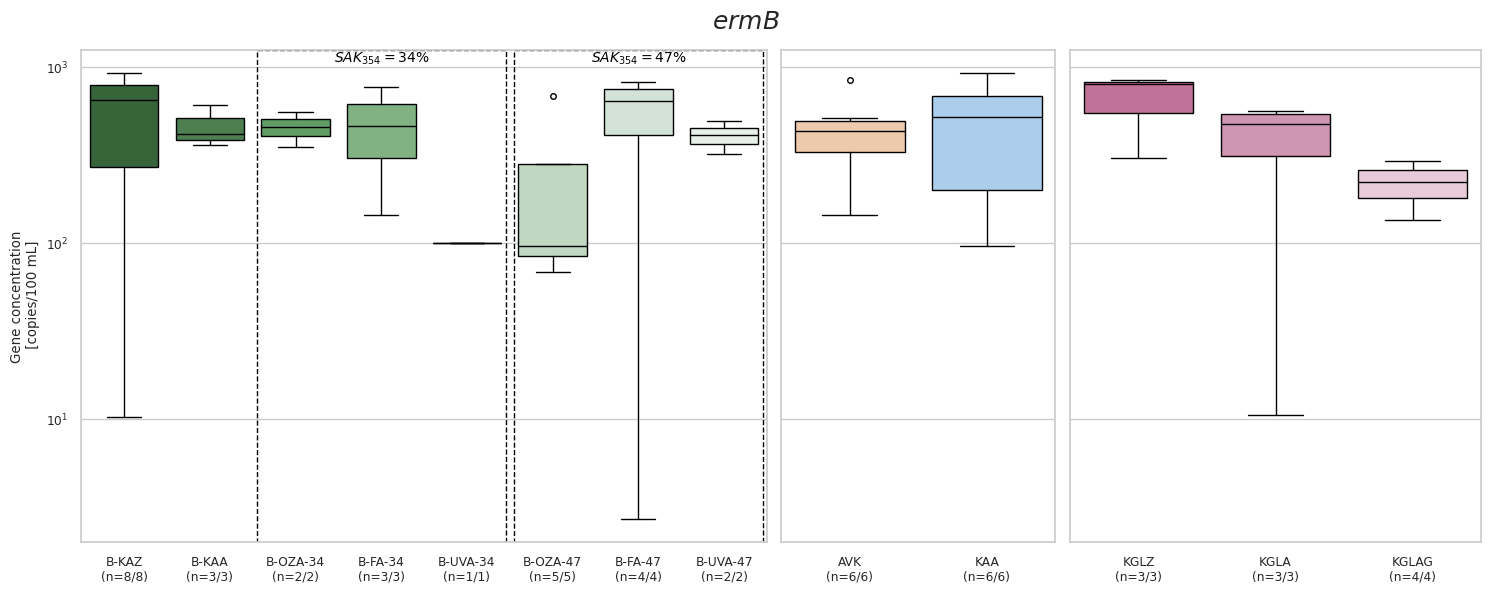

In [9]:
selected_gene = 'ermB'

groups = {
    'b1-b5': ['B-KAZ', 'B-KAA', 'B-OZA', 'B-FA', 'B-UVA'],
    'VKK-AKK': ['AVK', 'KAA'],
    'GL1-GL5': ['KGLZ', 'KGLA', 'KGLAG']
}

palettes = [pBraunschweig, pNette, pGlessen]

# Calculation of the number of non-NaN values and total number of values for each PN location
non_nan_counts = MNG.groupby('PN-Stelle')[selected_gene].count()
total_counts = MNG.groupby('PN-Stelle')[selected_gene].size()

fig = plt.figure(figsize=(15, 6))
gs = gridspec.GridSpec(1, len(groups), width_ratios=[len(group) for group in groups.values()])

# Settings for the plot design
ax1 = fig.add_subplot(gs[0])
axes = [ax1] + [fig.add_subplot(gs[i], sharey=ax1) for i in range(1, len(groups))]

order_first_subplot = ['B-KAZ', 'B-KAA', 'B-OZA-34', 'B-FA-34', 'B-UVA-34', 'B-OZA-47', 'B-FA-47', 'B-UVA-47']

for ax, (title, group), palette in zip(axes, groups.items(), palettes):
    # Filter the data for the current subplot
    filtered_df = MNG[MNG['PN-Stelle'].isin(group)].copy()
    
    # Split 'B-OZA', 'B-FA', and 'B-UVA' by SAK values
    if any(pn in group for pn in ['B-OZA', 'B-FA', 'B-UVA']):
        filtered_df['PN-Stelle-SAK'] = filtered_df.apply(
            lambda row: f"{row['PN-Stelle']}-{row['SAK']}" if row['PN-Stelle'] in ['B-OZA', 'B-FA', 'B-UVA'] else row['PN-Stelle'], 
            axis=1
        )
        # Calculate the number of non-NaN values and total number of values for each PN location-SAK combination
        non_nan_counts_sak = filtered_df.groupby('PN-Stelle-SAK')[selected_gene].count()
        total_counts_sak = filtered_df.groupby('PN-Stelle-SAK')[selected_gene].size()

        # Generate a unique order for plotting
        unique_pn_stelles = []
        for pn_stelle in group:
            if pn_stelle in ['B-OZA', 'B-FA', 'B-UVA']:
                unique_pn_stelles.extend([f"{pn_stelle}-34", f"{pn_stelle}-47"])
            else:
                unique_pn_stelles.append(pn_stelle)
                
        if ax == ax1:
            sns.boxplot(
                x='PN-Stelle-SAK', 
                y=selected_gene, 
                data=filtered_df, 
                ax=ax, 
                palette=palette, 
                order=order_first_subplot,
                flierprops=dict(marker='o', markersize=4, linestyle='None', markeredgecolor='black', markerfacecolor='white'),
                boxprops=dict(edgecolor="black", linewidth=1),
                whiskerprops=dict(color="black", linewidth=1),
                capprops=dict(color="black", linewidth=1),
                medianprops=dict(color="black", linewidth=1)
            )
            new_labels = [f'{pn_stelle_sak}\n(n={non_nan_counts_sak.get(pn_stelle_sak, 0)}/{total_counts_sak.get(pn_stelle_sak, 0)})' for pn_stelle_sak in order_first_subplot]
        else:
            sns.boxplot(
                x='PN-Stelle-SAK', 
                y=selected_gene, 
                data=filtered_df, 
                ax=ax, 
                palette=palette, 
                order=unique_pn_stelles,
                flierprops=dict(marker='o', markersize=4, linestyle='None', markeredgecolor='black', markerfacecolor='white'),
                boxprops=dict(edgecolor="black", linewidth=1),
                whiskerprops=dict(color="black", linewidth=1),
                capprops=dict(color="black", linewidth=1),
                medianprops=dict(color="black", linewidth=1)
            )
            new_labels = [f'{pn_stelle_sak}\n(n={non_nan_counts_sak.get(pn_stelle_sak, 0)}/{total_counts_sak.get(pn_stelle_sak, 0)})' for pn_stelle_sak in unique_pn_stelles]
    else:
        sns.boxplot(
            x='PN-Stelle', 
            y=selected_gene, 
            data=filtered_df, 
            ax=ax, 
            palette=palette,
            flierprops=dict(marker='o', markersize=4, linestyle='None', markeredgecolor='black', markerfacecolor='white'),
            boxprops=dict(edgecolor="black", linewidth=1),
            whiskerprops=dict(color="black", linewidth=1),
            capprops=dict(color="black", linewidth=1),
            medianprops=dict(color="black", linewidth=1)
        )
        new_labels = [f'{pn_stelle}\n(n={non_nan_counts.get(pn_stelle, 0)}/{total_counts.get(pn_stelle, 0)})' for pn_stelle in group]

    ax.set_xticklabels(new_labels, rotation=0)
    ax.set_xlabel('')
    ax.set_ylabel('Gene concentration\n [copies/100 mL]' if ax is axes[0] else '')
    ax.set_yscale('log')

    if ax != axes[0]:
        plt.setp(ax.get_yticklabels(), visible=False)
        ax.set_ylabel('')
        
# Add the second rectangle to the first subplot (ax1)      
rect34 = patches.Rectangle((4.55, -1), 2.9, ax1.get_ylim()[1] + 1, linewidth=1, edgecolor='black', facecolor='none', linestyle='--')
ax1.add_patch(rect34)
ax1.text(3, ax1.get_ylim()[1], '$\Delta SAK_{354} = 34\%$', ha='center', va='top', fontsize=10, color='black')

rect47 = patches.Rectangle((1.55, -1), 2.9, ax1.get_ylim()[1] + 1, linewidth=1, edgecolor='black', facecolor='none', linestyle='--')
ax1.add_patch(rect47)
ax1.text(6, ax1.get_ylim()[1], '$\Delta SAK_{354} = 47\%$', ha='center', va='top', fontsize=10, color='black')

fig.suptitle(r'$\bf{\it{ermB}}$', fontsize=18)
plt.tight_layout()
plt.show()

***

## $bla_{TEM}$

<div style="text-align: justify; max-width: 850px">

</div>

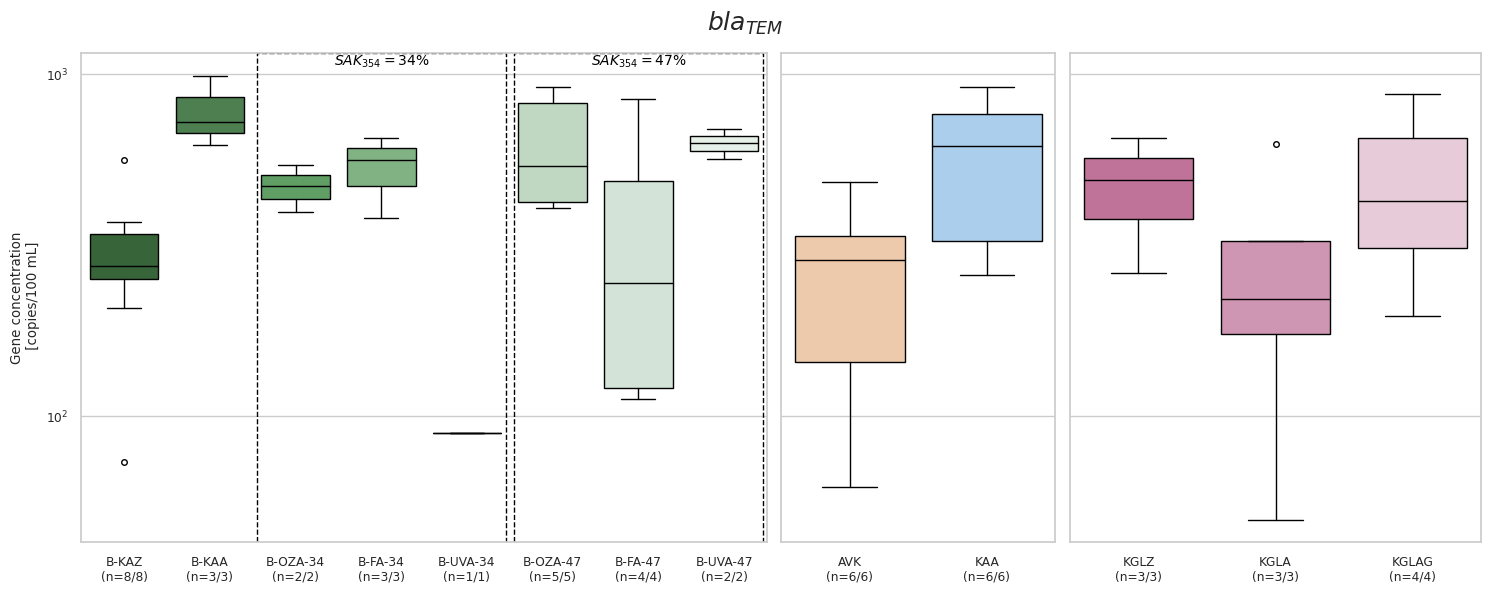

In [10]:
selected_gene = 'blaTEM'

groups = {
    'b1-b5': ['B-KAZ', 'B-KAA', 'B-OZA', 'B-FA', 'B-UVA'],
    'VKK-AKK': ['AVK', 'KAA'],
    'GL1-GL5': ['KGLZ', 'KGLA', 'KGLAG']
}

palettes = [pBraunschweig, pNette, pGlessen]

# Calculation of the number of non-NaN values and total number of values for each PN location
non_nan_counts = MNG.groupby('PN-Stelle')[selected_gene].count()
total_counts = MNG.groupby('PN-Stelle')[selected_gene].size()

fig = plt.figure(figsize=(15, 6))
gs = gridspec.GridSpec(1, len(groups), width_ratios=[len(group) for group in groups.values()])

# Settings for the plot design
ax1 = fig.add_subplot(gs[0])
axes = [ax1] + [fig.add_subplot(gs[i], sharey=ax1) for i in range(1, len(groups))]

order_first_subplot = ['B-KAZ', 'B-KAA', 'B-OZA-34', 'B-FA-34', 'B-UVA-34', 'B-OZA-47', 'B-FA-47', 'B-UVA-47']

for ax, (title, group), palette in zip(axes, groups.items(), palettes):
    # Filter the data for the current subplot
    filtered_df = MNG[MNG['PN-Stelle'].isin(group)].copy()
    
    # Split 'B-OZA', 'B-FA', and 'B-UVA' by SAK values
    if any(pn in group for pn in ['B-OZA', 'B-FA', 'B-UVA']):
        filtered_df['PN-Stelle-SAK'] = filtered_df.apply(
            lambda row: f"{row['PN-Stelle']}-{row['SAK']}" if row['PN-Stelle'] in ['B-OZA', 'B-FA', 'B-UVA'] else row['PN-Stelle'], 
            axis=1
        )
        # Calculate the number of non-NaN values and total number of values for each PN location-SAK combination
        non_nan_counts_sak = filtered_df.groupby('PN-Stelle-SAK')[selected_gene].count()
        total_counts_sak = filtered_df.groupby('PN-Stelle-SAK')[selected_gene].size()

        # Generate a unique order for plotting
        unique_pn_stelles = []
        for pn_stelle in group:
            if pn_stelle in ['B-OZA', 'B-FA', 'B-UVA']:
                unique_pn_stelles.extend([f"{pn_stelle}-34", f"{pn_stelle}-47"])
            else:
                unique_pn_stelles.append(pn_stelle)
                
        if ax == ax1:
            sns.boxplot(
                x='PN-Stelle-SAK', 
                y=selected_gene, 
                data=filtered_df, 
                ax=ax, 
                palette=palette, 
                order=order_first_subplot,
                flierprops=dict(marker='o', markersize=4, linestyle='None', markeredgecolor='black', markerfacecolor='white'),
                boxprops=dict(edgecolor="black", linewidth=1),
                whiskerprops=dict(color="black", linewidth=1),
                capprops=dict(color="black", linewidth=1),
                medianprops=dict(color="black", linewidth=1)
            )
            new_labels = [f'{pn_stelle_sak}\n(n={non_nan_counts_sak.get(pn_stelle_sak, 0)}/{total_counts_sak.get(pn_stelle_sak, 0)})' for pn_stelle_sak in order_first_subplot]
        else:
            sns.boxplot(
                x='PN-Stelle-SAK', 
                y=selected_gene, 
                data=filtered_df, 
                ax=ax, 
                palette=palette, 
                order=unique_pn_stelles,
                flierprops=dict(marker='o', markersize=4, linestyle='None', markeredgecolor='black', markerfacecolor='white'),
                boxprops=dict(edgecolor="black", linewidth=1),
                whiskerprops=dict(color="black", linewidth=1),
                capprops=dict(color="black", linewidth=1),
                medianprops=dict(color="black", linewidth=1)
            )
            new_labels = [f'{pn_stelle_sak}\n(n={non_nan_counts_sak.get(pn_stelle_sak, 0)}/{total_counts_sak.get(pn_stelle_sak, 0)})' for pn_stelle_sak in unique_pn_stelles]
    else:
        sns.boxplot(
            x='PN-Stelle', 
            y=selected_gene, 
            data=filtered_df, 
            ax=ax, 
            palette=palette,
            flierprops=dict(marker='o', markersize=4, linestyle='None', markeredgecolor='black', markerfacecolor='white'),
            boxprops=dict(edgecolor="black", linewidth=1),
            whiskerprops=dict(color="black", linewidth=1),
            capprops=dict(color="black", linewidth=1),
            medianprops=dict(color="black", linewidth=1)
        )
        new_labels = [f'{pn_stelle}\n(n={non_nan_counts.get(pn_stelle, 0)}/{total_counts.get(pn_stelle, 0)})' for pn_stelle in group]

    ax.set_xticklabels(new_labels, rotation=0)
    ax.set_xlabel('')
    ax.set_ylabel('Gene concentration\n [copies/100 mL]' if ax is axes[0] else '')
    ax.set_yscale('log')

    if ax != axes[0]:
        plt.setp(ax.get_yticklabels(), visible=False)
        ax.set_ylabel('')
        
# Add the second rectangle to the first subplot (ax1)      
rect34 = patches.Rectangle((4.55, -1), 2.9, ax1.get_ylim()[1] + 1, linewidth=1, edgecolor='black', facecolor='none', linestyle='--')
ax1.add_patch(rect34)
ax1.text(3, ax1.get_ylim()[1], '$\Delta SAK_{354} = 34\%$', ha='center', va='top', fontsize=10, color='black')

rect47 = patches.Rectangle((1.55, -1), 2.9, ax1.get_ylim()[1] + 1, linewidth=1, edgecolor='black', facecolor='none', linestyle='--')
ax1.add_patch(rect47)
ax1.text(6, ax1.get_ylim()[1], '$\Delta SAK_{354} = 47\%$', ha='center', va='top', fontsize=10, color='black')

fig.suptitle(r'$\bf{\it{bla}_{\it{TEM}}}$', fontsize=18)
plt.tight_layout()
plt.show()

***

## Subplots for all genes (normalized)

<div style="text-align: justify; max-width: 850px">

</div>

## mrc-1

<div style="text-align: justify; max-width: 850px">

</div>

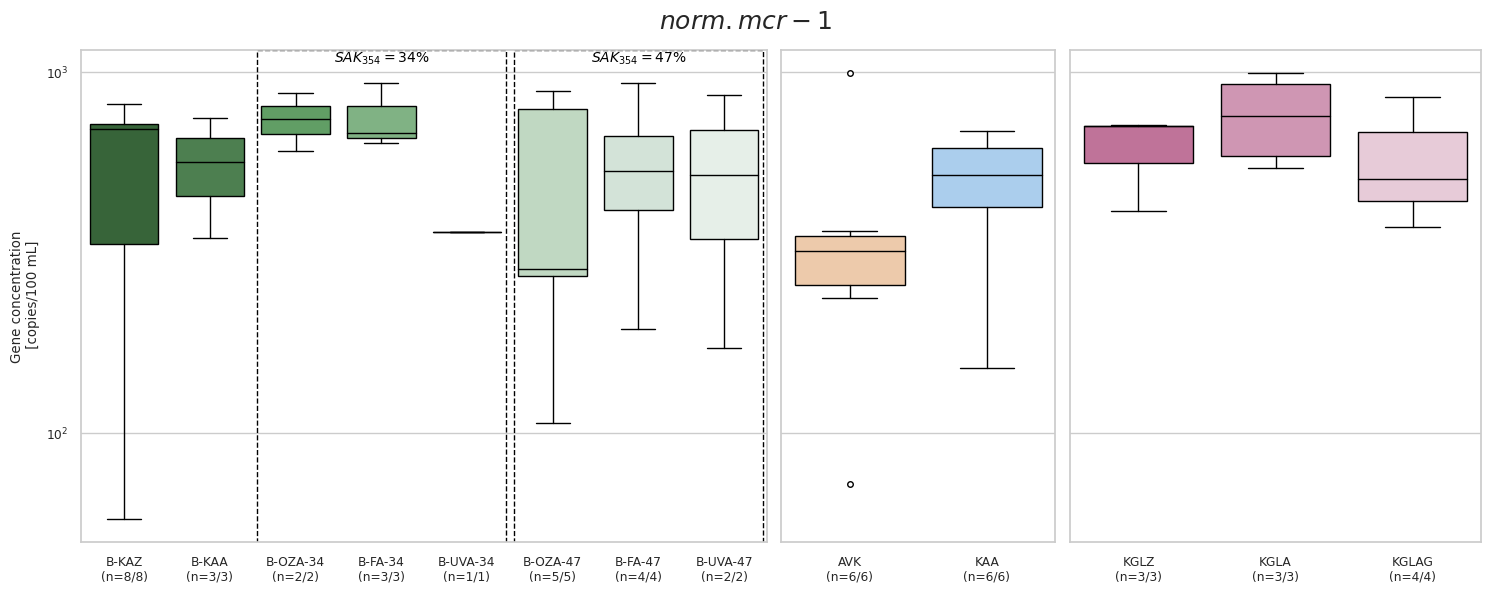

In [11]:
selected_gene = 'norm. mcr-1'

groups = {
    'b1-b5': ['B-KAZ', 'B-KAA', 'B-OZA', 'B-FA', 'B-UVA'],
    'VKK-AKK': ['AVK', 'KAA'],
    'GL1-GL5': ['KGLZ', 'KGLA', 'KGLAG']
}

palettes = [pBraunschweig, pNette, pGlessen]

# Calculation of the number of non-NaN values and total number of values for each PN location
non_nan_counts = MNG.groupby('PN-Stelle')[selected_gene].count()
total_counts = MNG.groupby('PN-Stelle')[selected_gene].size()

fig = plt.figure(figsize=(15, 6))
gs = gridspec.GridSpec(1, len(groups), width_ratios=[len(group) for group in groups.values()])

# Settings for the plot design
ax1 = fig.add_subplot(gs[0])
axes = [ax1] + [fig.add_subplot(gs[i], sharey=ax1) for i in range(1, len(groups))]

order_first_subplot = ['B-KAZ', 'B-KAA', 'B-OZA-34', 'B-FA-34', 'B-UVA-34', 'B-OZA-47', 'B-FA-47', 'B-UVA-47']

for ax, (title, group), palette in zip(axes, groups.items(), palettes):
    # Filter the data for the current subplot
    filtered_df = MNG[MNG['PN-Stelle'].isin(group)].copy()
    
    # Split 'B-OZA', 'B-FA', and 'B-UVA' by SAK values
    if any(pn in group for pn in ['B-OZA', 'B-FA', 'B-UVA']):
        filtered_df['PN-Stelle-SAK'] = filtered_df.apply(
            lambda row: f"{row['PN-Stelle']}-{row['SAK']}" if row['PN-Stelle'] in ['B-OZA', 'B-FA', 'B-UVA'] else row['PN-Stelle'], 
            axis=1
        )
        # Calculate the number of non-NaN values and total number of values for each PN location-SAK combination
        non_nan_counts_sak = filtered_df.groupby('PN-Stelle-SAK')[selected_gene].count()
        total_counts_sak = filtered_df.groupby('PN-Stelle-SAK')[selected_gene].size()

        # Generate a unique order for plotting
        unique_pn_stelles = []
        for pn_stelle in group:
            if pn_stelle in ['B-OZA', 'B-FA', 'B-UVA']:
                unique_pn_stelles.extend([f"{pn_stelle}-34", f"{pn_stelle}-47"])
            else:
                unique_pn_stelles.append(pn_stelle)
                
        if ax == ax1:
            sns.boxplot(
                x='PN-Stelle-SAK', 
                y=selected_gene, 
                data=filtered_df, 
                ax=ax, 
                palette=palette, 
                order=order_first_subplot,
                flierprops=dict(marker='o', markersize=4, linestyle='None', markeredgecolor='black', markerfacecolor='white'),
                boxprops=dict(edgecolor="black", linewidth=1),
                whiskerprops=dict(color="black", linewidth=1),
                capprops=dict(color="black", linewidth=1),
                medianprops=dict(color="black", linewidth=1)
            )
            new_labels = [f'{pn_stelle_sak}\n(n={non_nan_counts_sak.get(pn_stelle_sak, 0)}/{total_counts_sak.get(pn_stelle_sak, 0)})' for pn_stelle_sak in order_first_subplot]
        else:
            sns.boxplot(
                x='PN-Stelle-SAK', 
                y=selected_gene, 
                data=filtered_df, 
                ax=ax, 
                palette=palette, 
                order=unique_pn_stelles,
                flierprops=dict(marker='o', markersize=4, linestyle='None', markeredgecolor='black', markerfacecolor='white'),
                boxprops=dict(edgecolor="black", linewidth=1),
                whiskerprops=dict(color="black", linewidth=1),
                capprops=dict(color="black", linewidth=1),
                medianprops=dict(color="black", linewidth=1)
            )
            new_labels = [f'{pn_stelle_sak}\n(n={non_nan_counts_sak.get(pn_stelle_sak, 0)}/{total_counts_sak.get(pn_stelle_sak, 0)})' for pn_stelle_sak in unique_pn_stelles]
    else:
        sns.boxplot(
            x='PN-Stelle', 
            y=selected_gene, 
            data=filtered_df, 
            ax=ax, 
            palette=palette,
            flierprops=dict(marker='o', markersize=4, linestyle='None', markeredgecolor='black', markerfacecolor='white'),
            boxprops=dict(edgecolor="black", linewidth=1),
            whiskerprops=dict(color="black", linewidth=1),
            capprops=dict(color="black", linewidth=1),
            medianprops=dict(color="black", linewidth=1)
        )
        new_labels = [f'{pn_stelle}\n(n={non_nan_counts.get(pn_stelle, 0)}/{total_counts.get(pn_stelle, 0)})' for pn_stelle in group]

    ax.set_xticklabels(new_labels, rotation=0)
    ax.set_xlabel('')
    ax.set_ylabel('Gene concentration\n [copies/100 mL]' if ax is axes[0] else '')
    ax.set_yscale('log')

    if ax != axes[0]:
        plt.setp(ax.get_yticklabels(), visible=False)
        ax.set_ylabel('')
        
# Add the second rectangle to the first subplot (ax1)      
rect34 = patches.Rectangle((4.55, -1), 2.9, ax1.get_ylim()[1] + 1, linewidth=1, edgecolor='black', facecolor='none', linestyle='--')
ax1.add_patch(rect34)
ax1.text(3, ax1.get_ylim()[1], '$\Delta SAK_{354} = 34\%$', ha='center', va='top', fontsize=10, color='black')

rect47 = patches.Rectangle((1.55, -1), 2.9, ax1.get_ylim()[1] + 1, linewidth=1, edgecolor='black', facecolor='none', linestyle='--')
ax1.add_patch(rect47)
ax1.text(6, ax1.get_ylim()[1], '$\Delta SAK_{354} = 47\%$', ha='center', va='top', fontsize=10, color='black')

fig.suptitle(r'$\it{norm. mcr-1}$', fontsize=18)
plt.tight_layout()
plt.show()

***

## $bla_{NDM-1}$

<div style="text-align: justify; max-width: 850px">

</div>

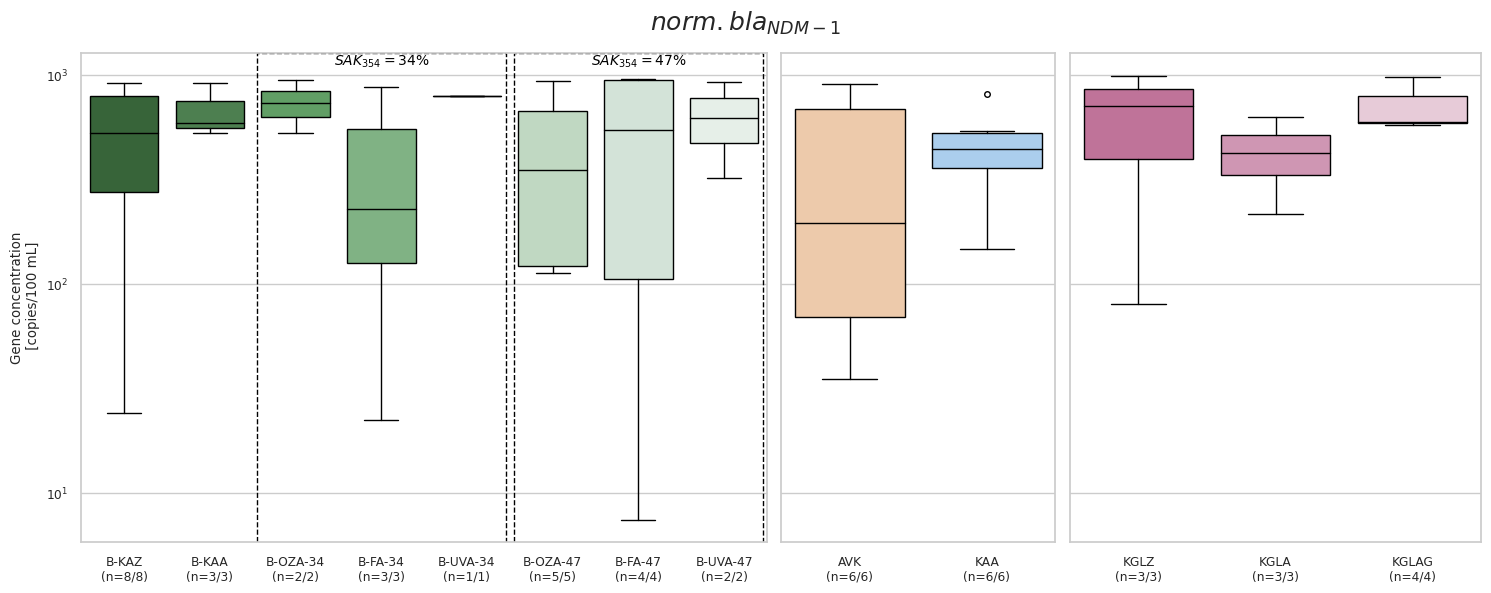

In [12]:
selected_gene = 'norm. blaNDM-1'

groups = {
    'b1-b5': ['B-KAZ', 'B-KAA', 'B-OZA', 'B-FA', 'B-UVA'],
    'VKK-AKK': ['AVK', 'KAA'],
    'GL1-GL5': ['KGLZ', 'KGLA', 'KGLAG']
}

palettes = [pBraunschweig, pNette, pGlessen]

# Calculation of the number of non-NaN values and total number of values for each PN location
non_nan_counts = MNG.groupby('PN-Stelle')[selected_gene].count()
total_counts = MNG.groupby('PN-Stelle')[selected_gene].size()

fig = plt.figure(figsize=(15, 6))
gs = gridspec.GridSpec(1, len(groups), width_ratios=[len(group) for group in groups.values()])

# Settings for the plot design
ax1 = fig.add_subplot(gs[0])
axes = [ax1] + [fig.add_subplot(gs[i], sharey=ax1) for i in range(1, len(groups))]

order_first_subplot = ['B-KAZ', 'B-KAA', 'B-OZA-34', 'B-FA-34', 'B-UVA-34', 'B-OZA-47', 'B-FA-47', 'B-UVA-47']

for ax, (title, group), palette in zip(axes, groups.items(), palettes):
    # Filter the data for the current subplot
    filtered_df = MNG[MNG['PN-Stelle'].isin(group)].copy()
    
    # Split 'B-OZA', 'B-FA', and 'B-UVA' by SAK values
    if any(pn in group for pn in ['B-OZA', 'B-FA', 'B-UVA']):
        filtered_df['PN-Stelle-SAK'] = filtered_df.apply(
            lambda row: f"{row['PN-Stelle']}-{row['SAK']}" if row['PN-Stelle'] in ['B-OZA', 'B-FA', 'B-UVA'] else row['PN-Stelle'], 
            axis=1
        )
        # Calculate the number of non-NaN values and total number of values for each PN location-SAK combination
        non_nan_counts_sak = filtered_df.groupby('PN-Stelle-SAK')[selected_gene].count()
        total_counts_sak = filtered_df.groupby('PN-Stelle-SAK')[selected_gene].size()

        # Generate a unique order for plotting
        unique_pn_stelles = []
        for pn_stelle in group:
            if pn_stelle in ['B-OZA', 'B-FA', 'B-UVA']:
                unique_pn_stelles.extend([f"{pn_stelle}-34", f"{pn_stelle}-47"])
            else:
                unique_pn_stelles.append(pn_stelle)
                
        if ax == ax1:
            sns.boxplot(
                x='PN-Stelle-SAK', 
                y=selected_gene, 
                data=filtered_df, 
                ax=ax, 
                palette=palette, 
                order=order_first_subplot,
                flierprops=dict(marker='o', markersize=4, linestyle='None', markeredgecolor='black', markerfacecolor='white'),
                boxprops=dict(edgecolor="black", linewidth=1),
                whiskerprops=dict(color="black", linewidth=1),
                capprops=dict(color="black", linewidth=1),
                medianprops=dict(color="black", linewidth=1)
            )
            new_labels = [f'{pn_stelle_sak}\n(n={non_nan_counts_sak.get(pn_stelle_sak, 0)}/{total_counts_sak.get(pn_stelle_sak, 0)})' for pn_stelle_sak in order_first_subplot]
        else:
            sns.boxplot(
                x='PN-Stelle-SAK', 
                y=selected_gene, 
                data=filtered_df, 
                ax=ax, 
                palette=palette, 
                order=unique_pn_stelles,
                flierprops=dict(marker='o', markersize=4, linestyle='None', markeredgecolor='black', markerfacecolor='white'),
                boxprops=dict(edgecolor="black", linewidth=1),
                whiskerprops=dict(color="black", linewidth=1),
                capprops=dict(color="black", linewidth=1),
                medianprops=dict(color="black", linewidth=1)
            )
            new_labels = [f'{pn_stelle_sak}\n(n={non_nan_counts_sak.get(pn_stelle_sak, 0)}/{total_counts_sak.get(pn_stelle_sak, 0)})' for pn_stelle_sak in unique_pn_stelles]
    else:
        sns.boxplot(
            x='PN-Stelle', 
            y=selected_gene, 
            data=filtered_df, 
            ax=ax, 
            palette=palette,
            flierprops=dict(marker='o', markersize=4, linestyle='None', markeredgecolor='black', markerfacecolor='white'),
            boxprops=dict(edgecolor="black", linewidth=1),
            whiskerprops=dict(color="black", linewidth=1),
            capprops=dict(color="black", linewidth=1),
            medianprops=dict(color="black", linewidth=1)
        )
        new_labels = [f'{pn_stelle}\n(n={non_nan_counts.get(pn_stelle, 0)}/{total_counts.get(pn_stelle, 0)})' for pn_stelle in group]

    ax.set_xticklabels(new_labels, rotation=0)
    ax.set_xlabel('')
    ax.set_ylabel('Gene concentration\n [copies/100 mL]' if ax is axes[0] else '')
    ax.set_yscale('log')

    if ax != axes[0]:
        plt.setp(ax.get_yticklabels(), visible=False)
        ax.set_ylabel('')
        
# Add the second rectangle to the first subplot (ax1)      
rect34 = patches.Rectangle((4.55, -1), 2.9, ax1.get_ylim()[1] + 1, linewidth=1, edgecolor='black', facecolor='none', linestyle='--')
ax1.add_patch(rect34)
ax1.text(3, ax1.get_ylim()[1], '$\Delta SAK_{354} = 34\%$', ha='center', va='top', fontsize=10, color='black')

rect47 = patches.Rectangle((1.55, -1), 2.9, ax1.get_ylim()[1] + 1, linewidth=1, edgecolor='black', facecolor='none', linestyle='--')
ax1.add_patch(rect47)
ax1.text(6, ax1.get_ylim()[1], '$\Delta SAK_{354} = 47\%$', ha='center', va='top', fontsize=10, color='black')

fig.suptitle(r'$\bf{\it{norm. bla}_{\it{NDM-1}}}$', fontsize=18)
plt.tight_layout()
plt.show()

***

## $ermB$

<div style="text-align: justify; max-width: 850px">

</div>

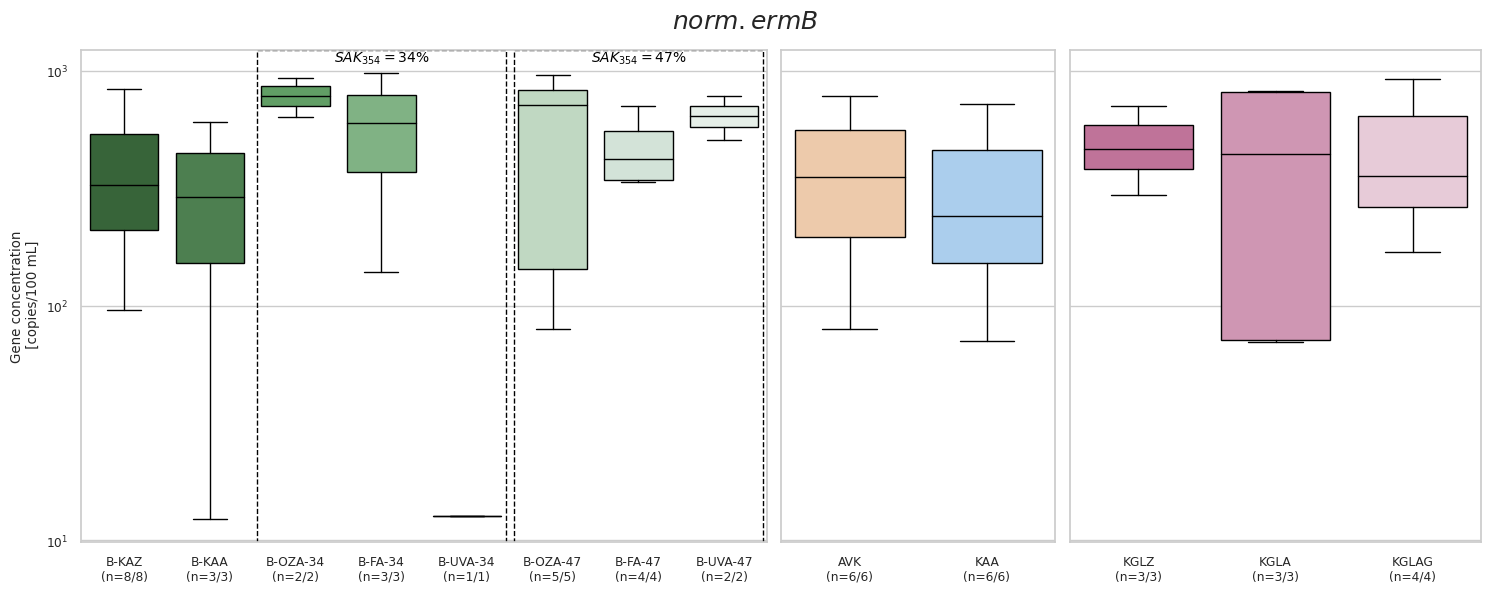

In [13]:
selected_gene = 'norm. ermB'

groups = {
    'b1-b5': ['B-KAZ', 'B-KAA', 'B-OZA', 'B-FA', 'B-UVA'],
    'VKK-AKK': ['AVK', 'KAA'],
    'GL1-GL5': ['KGLZ', 'KGLA', 'KGLAG']
}

palettes = [pBraunschweig, pNette, pGlessen]

# Calculation of the number of non-NaN values and total number of values for each PN location
non_nan_counts = MNG.groupby('PN-Stelle')[selected_gene].count()
total_counts = MNG.groupby('PN-Stelle')[selected_gene].size()

fig = plt.figure(figsize=(15, 6))
gs = gridspec.GridSpec(1, len(groups), width_ratios=[len(group) for group in groups.values()])

# Settings for the plot design
ax1 = fig.add_subplot(gs[0])
axes = [ax1] + [fig.add_subplot(gs[i], sharey=ax1) for i in range(1, len(groups))]

order_first_subplot = ['B-KAZ', 'B-KAA', 'B-OZA-34', 'B-FA-34', 'B-UVA-34', 'B-OZA-47', 'B-FA-47', 'B-UVA-47']

for ax, (title, group), palette in zip(axes, groups.items(), palettes):
    # Filter the data for the current subplot
    filtered_df = MNG[MNG['PN-Stelle'].isin(group)].copy()
    
    # Split 'B-OZA', 'B-FA', and 'B-UVA' by SAK values
    if any(pn in group for pn in ['B-OZA', 'B-FA', 'B-UVA']):
        filtered_df['PN-Stelle-SAK'] = filtered_df.apply(
            lambda row: f"{row['PN-Stelle']}-{row['SAK']}" if row['PN-Stelle'] in ['B-OZA', 'B-FA', 'B-UVA'] else row['PN-Stelle'], 
            axis=1
        )
        # Calculate the number of non-NaN values and total number of values for each PN location-SAK combination
        non_nan_counts_sak = filtered_df.groupby('PN-Stelle-SAK')[selected_gene].count()
        total_counts_sak = filtered_df.groupby('PN-Stelle-SAK')[selected_gene].size()

        # Generate a unique order for plotting
        unique_pn_stelles = []
        for pn_stelle in group:
            if pn_stelle in ['B-OZA', 'B-FA', 'B-UVA']:
                unique_pn_stelles.extend([f"{pn_stelle}-34", f"{pn_stelle}-47"])
            else:
                unique_pn_stelles.append(pn_stelle)
                
        if ax == ax1:
            sns.boxplot(
                x='PN-Stelle-SAK', 
                y=selected_gene, 
                data=filtered_df, 
                ax=ax, 
                palette=palette, 
                order=order_first_subplot,
                flierprops=dict(marker='o', markersize=4, linestyle='None', markeredgecolor='black', markerfacecolor='white'),
                boxprops=dict(edgecolor="black", linewidth=1),
                whiskerprops=dict(color="black", linewidth=1),
                capprops=dict(color="black", linewidth=1),
                medianprops=dict(color="black", linewidth=1)
            )
            new_labels = [f'{pn_stelle_sak}\n(n={non_nan_counts_sak.get(pn_stelle_sak, 0)}/{total_counts_sak.get(pn_stelle_sak, 0)})' for pn_stelle_sak in order_first_subplot]
        else:
            sns.boxplot(
                x='PN-Stelle-SAK', 
                y=selected_gene, 
                data=filtered_df, 
                ax=ax, 
                palette=palette, 
                order=unique_pn_stelles,
                flierprops=dict(marker='o', markersize=4, linestyle='None', markeredgecolor='black', markerfacecolor='white'),
                boxprops=dict(edgecolor="black", linewidth=1),
                whiskerprops=dict(color="black", linewidth=1),
                capprops=dict(color="black", linewidth=1),
                medianprops=dict(color="black", linewidth=1)
            )
            new_labels = [f'{pn_stelle_sak}\n(n={non_nan_counts_sak.get(pn_stelle_sak, 0)}/{total_counts_sak.get(pn_stelle_sak, 0)})' for pn_stelle_sak in unique_pn_stelles]
    else:
        sns.boxplot(
            x='PN-Stelle', 
            y=selected_gene, 
            data=filtered_df, 
            ax=ax, 
            palette=palette,
            flierprops=dict(marker='o', markersize=4, linestyle='None', markeredgecolor='black', markerfacecolor='white'),
            boxprops=dict(edgecolor="black", linewidth=1),
            whiskerprops=dict(color="black", linewidth=1),
            capprops=dict(color="black", linewidth=1),
            medianprops=dict(color="black", linewidth=1)
        )
        new_labels = [f'{pn_stelle}\n(n={non_nan_counts.get(pn_stelle, 0)}/{total_counts.get(pn_stelle, 0)})' for pn_stelle in group]

    ax.set_xticklabels(new_labels, rotation=0)
    ax.set_xlabel('')
    ax.set_ylabel('Gene concentration\n [copies/100 mL]' if ax is axes[0] else '')
    ax.set_yscale('log')

    if ax != axes[0]:
        plt.setp(ax.get_yticklabels(), visible=False)
        ax.set_ylabel('')
        
# Add the second rectangle to the first subplot (ax1)      
rect34 = patches.Rectangle((4.55, -1), 2.9, ax1.get_ylim()[1] + 1, linewidth=1, edgecolor='black', facecolor='none', linestyle='--')
ax1.add_patch(rect34)
ax1.text(3, ax1.get_ylim()[1], '$\Delta SAK_{354} = 34\%$', ha='center', va='top', fontsize=10, color='black')

rect47 = patches.Rectangle((1.55, -1), 2.9, ax1.get_ylim()[1] + 1, linewidth=1, edgecolor='black', facecolor='none', linestyle='--')
ax1.add_patch(rect47)
ax1.text(6, ax1.get_ylim()[1], '$\Delta SAK_{354} = 47\%$', ha='center', va='top', fontsize=10, color='black')

fig.suptitle(r'$\bf{\it{norm. ermB}}$', fontsize=18)
plt.tight_layout()
plt.show()

***

## $bla_{TEM}$

<div style="text-align: justify; max-width: 850px">

</div>

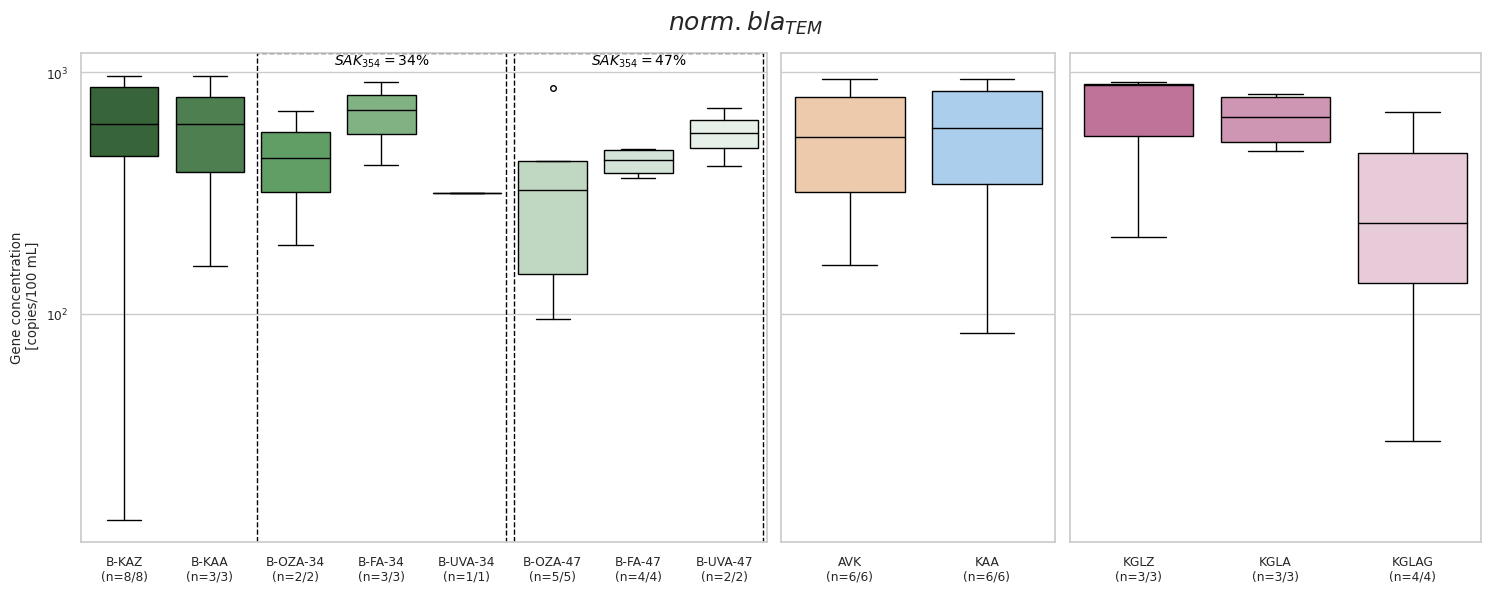

In [14]:
selected_gene = 'norm. blaTEM'

groups = {
    'b1-b5': ['B-KAZ', 'B-KAA', 'B-OZA', 'B-FA', 'B-UVA'],
    'VKK-AKK': ['AVK', 'KAA'],
    'GL1-GL5': ['KGLZ', 'KGLA', 'KGLAG']
}

palettes = [pBraunschweig, pNette, pGlessen]

# Calculation of the number of non-NaN values and total number of values for each PN location
non_nan_counts = MNG.groupby('PN-Stelle')[selected_gene].count()
total_counts = MNG.groupby('PN-Stelle')[selected_gene].size()

fig = plt.figure(figsize=(15, 6))
gs = gridspec.GridSpec(1, len(groups), width_ratios=[len(group) for group in groups.values()])

# Settings for the plot design
ax1 = fig.add_subplot(gs[0])
axes = [ax1] + [fig.add_subplot(gs[i], sharey=ax1) for i in range(1, len(groups))]

order_first_subplot = ['B-KAZ', 'B-KAA', 'B-OZA-34', 'B-FA-34', 'B-UVA-34', 'B-OZA-47', 'B-FA-47', 'B-UVA-47']

for ax, (title, group), palette in zip(axes, groups.items(), palettes):
    # Filter the data for the current subplot
    filtered_df = MNG[MNG['PN-Stelle'].isin(group)].copy()
    
    # Split 'B-OZA', 'B-FA', and 'B-UVA' by SAK values
    if any(pn in group for pn in ['B-OZA', 'B-FA', 'B-UVA']):
        filtered_df['PN-Stelle-SAK'] = filtered_df.apply(
            lambda row: f"{row['PN-Stelle']}-{row['SAK']}" if row['PN-Stelle'] in ['B-OZA', 'B-FA', 'B-UVA'] else row['PN-Stelle'], 
            axis=1
        )
        # Calculate the number of non-NaN values and total number of values for each PN location-SAK combination
        non_nan_counts_sak = filtered_df.groupby('PN-Stelle-SAK')[selected_gene].count()
        total_counts_sak = filtered_df.groupby('PN-Stelle-SAK')[selected_gene].size()

        # Generate a unique order for plotting
        unique_pn_stelles = []
        for pn_stelle in group:
            if pn_stelle in ['B-OZA', 'B-FA', 'B-UVA']:
                unique_pn_stelles.extend([f"{pn_stelle}-34", f"{pn_stelle}-47"])
            else:
                unique_pn_stelles.append(pn_stelle)
                
        if ax == ax1:
            sns.boxplot(
                x='PN-Stelle-SAK', 
                y=selected_gene, 
                data=filtered_df, 
                ax=ax, 
                palette=palette, 
                order=order_first_subplot,
                flierprops=dict(marker='o', markersize=4, linestyle='None', markeredgecolor='black', markerfacecolor='white'),
                boxprops=dict(edgecolor="black", linewidth=1),
                whiskerprops=dict(color="black", linewidth=1),
                capprops=dict(color="black", linewidth=1),
                medianprops=dict(color="black", linewidth=1)
            )
            new_labels = [f'{pn_stelle_sak}\n(n={non_nan_counts_sak.get(pn_stelle_sak, 0)}/{total_counts_sak.get(pn_stelle_sak, 0)})' for pn_stelle_sak in order_first_subplot]
        else:
            sns.boxplot(
                x='PN-Stelle-SAK', 
                y=selected_gene, 
                data=filtered_df, 
                ax=ax, 
                palette=palette, 
                order=unique_pn_stelles,
                flierprops=dict(marker='o', markersize=4, linestyle='None', markeredgecolor='black', markerfacecolor='white'),
                boxprops=dict(edgecolor="black", linewidth=1),
                whiskerprops=dict(color="black", linewidth=1),
                capprops=dict(color="black", linewidth=1),
                medianprops=dict(color="black", linewidth=1)
            )
            new_labels = [f'{pn_stelle_sak}\n(n={non_nan_counts_sak.get(pn_stelle_sak, 0)}/{total_counts_sak.get(pn_stelle_sak, 0)})' for pn_stelle_sak in unique_pn_stelles]
    else:
        sns.boxplot(
            x='PN-Stelle', 
            y=selected_gene, 
            data=filtered_df, 
            ax=ax, 
            palette=palette,
            flierprops=dict(marker='o', markersize=4, linestyle='None', markeredgecolor='black', markerfacecolor='white'),
            boxprops=dict(edgecolor="black", linewidth=1),
            whiskerprops=dict(color="black", linewidth=1),
            capprops=dict(color="black", linewidth=1),
            medianprops=dict(color="black", linewidth=1)
        )
        new_labels = [f'{pn_stelle}\n(n={non_nan_counts.get(pn_stelle, 0)}/{total_counts.get(pn_stelle, 0)})' for pn_stelle in group]

    ax.set_xticklabels(new_labels, rotation=0)
    ax.set_xlabel('')
    ax.set_ylabel('Gene concentration\n [copies/100 mL]' if ax is axes[0] else '')
    ax.set_yscale('log')

    if ax != axes[0]:
        plt.setp(ax.get_yticklabels(), visible=False)
        ax.set_ylabel('')
        
# Add the second rectangle to the first subplot (ax1)      
rect34 = patches.Rectangle((4.55, -1), 2.9, ax1.get_ylim()[1] + 1, linewidth=1, edgecolor='black', facecolor='none', linestyle='--')
ax1.add_patch(rect34)
ax1.text(3, ax1.get_ylim()[1], '$\Delta SAK_{354} = 34\%$', ha='center', va='top', fontsize=10, color='black')

rect47 = patches.Rectangle((1.55, -1), 2.9, ax1.get_ylim()[1] + 1, linewidth=1, edgecolor='black', facecolor='none', linestyle='--')
ax1.add_patch(rect47)
ax1.text(6, ax1.get_ylim()[1], '$\Delta SAK_{354} = 47\%$', ha='center', va='top', fontsize=10, color='black')

fig.suptitle(r'$\bf{\it{norm. bla}_{\it{TEM}}}$', fontsize=18)
plt.tight_layout()
plt.show()

***

## MoNette
### All Genes vs. Locations

<div style="text-align: justify; max-width: 850px">

</div>

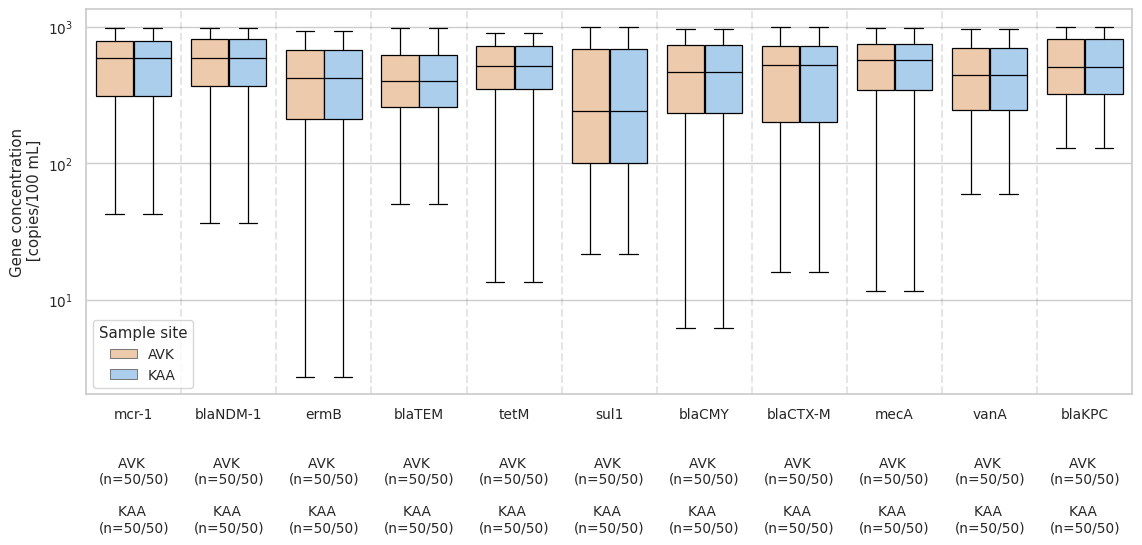

In [15]:
gene_names = [
    'mcr-1', 
    'blaNDM-1', 
    'ermB', 
    'blaTEM', 
    'tetM', 
    'sul1', 
    'blaCMY', 
    'blaCTX-M', 
    'mecA', 
    'vanA', 
    'blaKPC'
]

norm_gene_names = [
    'mcr-1', 
    'blaNDM-1', 
    'ermB', 
    'blaTEM', 
    'tetM', 
    'sul1', 
    'blaCMY', 
    'blaCTX-M', 
    'mecA', 
    'vanA', 
    'blaKPC'
]

# Initialise an empty DataFrame for the restructured data
long_df = pd.DataFrame()

for gen_name, norm_gen_name in zip(gene_names, norm_gene_names):
    # Data for the normal gene
    temp_df = pd.DataFrame({
        'Gen': gen_name,
        'Sample site': 'AVK',
        'Wert': MNG[gen_name]
    })

    # Data for the normalised gene
    temp_norm_df = pd.DataFrame({
        'Gen': gen_name,
        'Sample site': 'KAA',
        'Wert': MNG[norm_gen_name]
    })
    
    # Merge into a long DataFrame
    long_df = pd.concat([long_df, temp_df, temp_norm_df])    

# Calculate the number of non-NaN values and total number for each gene separately for each group
non_nan_counts = long_df.groupby(['Gen', 'Sample site'])['Wert'].count()
total_counts = long_df.groupby(['Gen', 'Sample site'])['Wert'].size()

# Draw box plots
sns.set_theme(style="whitegrid", font_scale=0.9)
flierprops = dict(marker='o', markersize=4, linestyle='None', markeredgecolor='black', markerfacecolor='white')
sns.set_palette(pNette)
plt.figure(
    figsize=(13.5, 5)
)
ax = sns.boxplot(
    x='Gen', 
    y='Wert', 
    hue='Sample site', 
    data=long_df, 
    flierprops=flierprops,
    boxprops=dict(edgecolor="black", linewidth=0.9),
    whiskerprops=dict(color="black", linewidth=0.9),
    capprops=dict(color="black", linewidth=0.9),
    medianprops=dict(color="black", linewidth=0.9)
)

# Customise the x-tick labels to display the calculated values
new_labels = []
for gen in gene_names:
    count_avk = f"\n(n={non_nan_counts.get((gen, 'AVK'), 0)}/{total_counts.get((gen, 'AVK'), 0)})"
    count_kaa = f"\n(n={non_nan_counts.get((gen, 'KAA'), 0)}/{total_counts.get((gen, 'KAA'), 0)})"
    new_labels.append(f'{gen}\n\n\nAVK {count_avk}\n\nKAA {count_kaa}')

ax.set_xticklabels(new_labels)

num_genes = len(gene_names)
for i in range(num_genes - 1):
    ax.axvline(x=i + 0.5, linestyle='--', color='grey', alpha=0.2)

plt.xlabel(None)
plt.ylabel('Gene concentration\n [copies/100 mL]')
ax.set_yscale('log')
plt.show()

***

### All Genes vs. Locations (normalized)

<div style="text-align: justify; max-width: 850px">

</div>

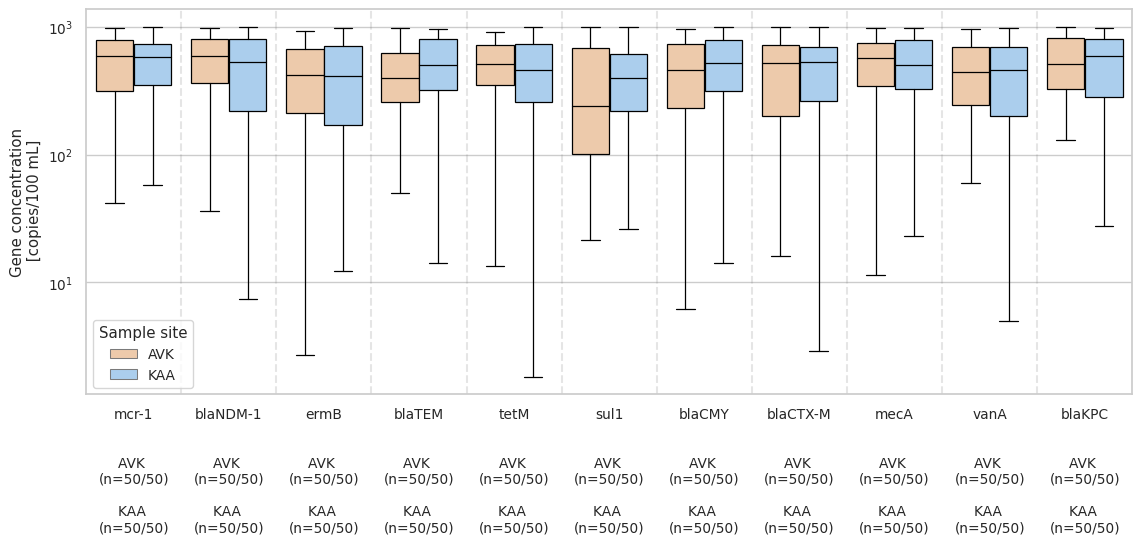

In [16]:
gene_names = [
    'mcr-1', 
    'blaNDM-1', 
    'ermB', 
    'blaTEM', 
    'tetM', 
    'sul1', 
    'blaCMY', 
    'blaCTX-M', 
    'mecA', 
    'vanA', 
    'blaKPC'
]

norm_gene_names = [
    'norm. mcr-1', 
    'norm. blaNDM-1', 
    'norm. ermB', 
    'norm. blaTEM', 
    'norm. tetM', 
    'norm. sul1', 
    'norm. blaCMY', 
    'norm. blaCTX-M', 
    'norm. mecA', 
    'norm. vanA', 
    'norm. blaKPC'
]


long_df = pd.DataFrame()

for gen_name, norm_gen_name in zip(gene_names, norm_gene_names):
    temp_df = pd.DataFrame({
        'Gen': gen_name,
        'Sample site': 'AVK',
        'Wert': MNG[gen_name]
    })

    temp_norm_df = pd.DataFrame({
        'Gen': gen_name,
        'Sample site': 'KAA',
        'Wert': MNG[norm_gen_name]
    })

    long_df = pd.concat([long_df, temp_df, temp_norm_df])    

non_nan_counts = long_df.groupby(['Gen', 'Sample site'])['Wert'].count()
total_counts = long_df.groupby(['Gen', 'Sample site'])['Wert'].size()

sns.set_theme(style="whitegrid", font_scale=0.9)
flierprops = dict(marker='o', markersize=4, linestyle='None', markeredgecolor='black', markerfacecolor='white')
sns.set_palette(pNette)
plt.figure(figsize=(13.5, 5))
ax = sns.boxplot(
    x='Gen',
    y='Wert', 
    hue='Sample site', 
    data=long_df, 
    flierprops=flierprops,
    boxprops=dict(edgecolor="black", linewidth=0.9),
    whiskerprops=dict(color="black", linewidth=0.9),
    capprops=dict(color="black", linewidth=0.9),
    medianprops=dict(color="black", linewidth=0.9)
)

new_labels = []
for gen in gene_names:
    count_avk = f"\n(n={non_nan_counts.get((gen, 'AVK'), 0)}/{total_counts.get((gen, 'AVK'), 0)})"
    count_kaa = f"\n(n={non_nan_counts.get((gen, 'KAA'), 0)}/{total_counts.get((gen, 'KAA'), 0)})"
    new_labels.append(f'{gen}\n\n\nAVK {count_avk}\n\nKAA {count_kaa}')

ax.set_xticklabels(new_labels)

num_genes = len(gene_names)
for i in range(num_genes - 1):
    ax.axvline(x=i + 0.5, linestyle='--', color='grey', alpha=0.2)

plt.xlabel(None)
plt.ylabel('Gene concentration\n [copies/100 mL]')
ax.set_yscale('log')
plt.show()

***

## Subplots for 16S rRNA

<div style="text-align: justify; max-width: 850px">

</div>

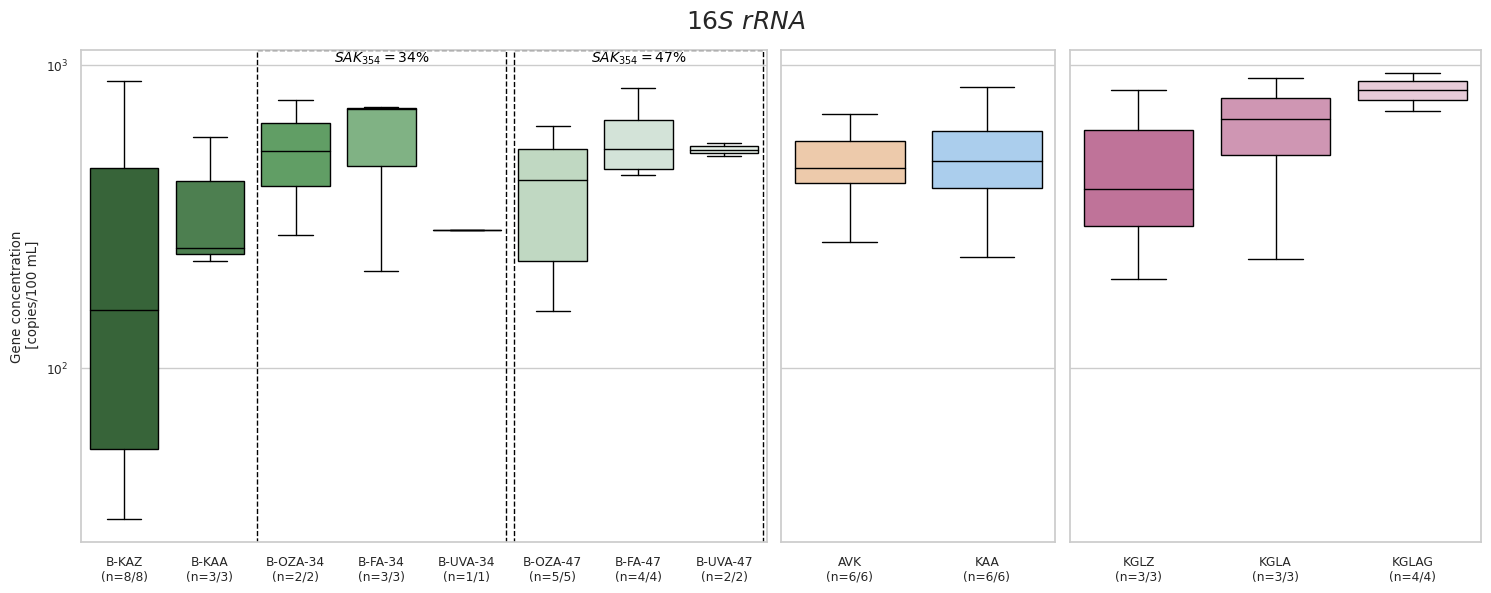

In [20]:
selected_gene = '16S rRNA'

groups = {
    'b1-b5': ['B-KAZ', 'B-KAA', 'B-OZA', 'B-FA', 'B-UVA'],
    'VKK-AKK': ['AVK', 'KAA'],
    'GL1-GL5': ['KGLZ', 'KGLA', 'KGLAG']
}

palettes = [pBraunschweig, pNette, pGlessen]

# Calculation of the number of non-NaN values and total number of values for each PN location
non_nan_counts = MNG.groupby('PN-Stelle')[selected_gene].count()
total_counts = MNG.groupby('PN-Stelle')[selected_gene].size()

fig = plt.figure(figsize=(15, 6))
gs = gridspec.GridSpec(1, len(groups), width_ratios=[len(group) for group in groups.values()])

# Settings for the plot design
ax1 = fig.add_subplot(gs[0])
axes = [ax1] + [fig.add_subplot(gs[i], sharey=ax1) for i in range(1, len(groups))]

order_first_subplot = ['B-KAZ', 'B-KAA', 'B-OZA-34', 'B-FA-34', 'B-UVA-34', 'B-OZA-47', 'B-FA-47', 'B-UVA-47']

for ax, (title, group), palette in zip(axes, groups.items(), palettes):
    # Filter the data for the current subplot
    filtered_df = MNG[MNG['PN-Stelle'].isin(group)].copy()
    
    # Split 'B-OZA', 'B-FA', and 'B-UVA' by SAK values
    if any(pn in group for pn in ['B-OZA', 'B-FA', 'B-UVA']):
        filtered_df['PN-Stelle-SAK'] = filtered_df.apply(
            lambda row: f"{row['PN-Stelle']}-{row['SAK']}" if row['PN-Stelle'] in ['B-OZA', 'B-FA', 'B-UVA'] else row['PN-Stelle'], 
            axis=1
        )
        # Calculate the number of non-NaN values and total number of values for each PN location-SAK combination
        non_nan_counts_sak = filtered_df.groupby('PN-Stelle-SAK')[selected_gene].count()
        total_counts_sak = filtered_df.groupby('PN-Stelle-SAK')[selected_gene].size()

        # Generate a unique order for plotting
        unique_pn_stelles = []
        for pn_stelle in group:
            if pn_stelle in ['B-OZA', 'B-FA', 'B-UVA']:
                unique_pn_stelles.extend([f"{pn_stelle}-34", f"{pn_stelle}-47"])
            else:
                unique_pn_stelles.append(pn_stelle)
                
        if ax == ax1:
            sns.boxplot(
                x='PN-Stelle-SAK', 
                y=selected_gene, 
                data=filtered_df, 
                ax=ax, 
                palette=palette, 
                order=order_first_subplot,
                flierprops=dict(marker='o', markersize=4, linestyle='None', markeredgecolor='black', markerfacecolor='white'),
                boxprops=dict(edgecolor="black", linewidth=1),
                whiskerprops=dict(color="black", linewidth=1),
                capprops=dict(color="black", linewidth=1),
                medianprops=dict(color="black", linewidth=1)
            )
            new_labels = [f'{pn_stelle_sak}\n(n={non_nan_counts_sak.get(pn_stelle_sak, 0)}/{total_counts_sak.get(pn_stelle_sak, 0)})' for pn_stelle_sak in order_first_subplot]
        else:
            sns.boxplot(
                x='PN-Stelle-SAK', 
                y=selected_gene, 
                data=filtered_df, 
                ax=ax, 
                palette=palette, 
                order=unique_pn_stelles,
                flierprops=dict(marker='o', markersize=4, linestyle='None', markeredgecolor='black', markerfacecolor='white'),
                boxprops=dict(edgecolor="black", linewidth=1),
                whiskerprops=dict(color="black", linewidth=1),
                capprops=dict(color="black", linewidth=1),
                medianprops=dict(color="black", linewidth=1)
            )
            new_labels = [f'{pn_stelle_sak}\n(n={non_nan_counts_sak.get(pn_stelle_sak, 0)}/{total_counts_sak.get(pn_stelle_sak, 0)})' for pn_stelle_sak in unique_pn_stelles]
    else:
        sns.boxplot(
            x='PN-Stelle', 
            y=selected_gene, 
            data=filtered_df, 
            ax=ax, 
            palette=palette,
            flierprops=dict(marker='o', markersize=4, linestyle='None', markeredgecolor='black', markerfacecolor='white'),
            boxprops=dict(edgecolor="black", linewidth=1),
            whiskerprops=dict(color="black", linewidth=1),
            capprops=dict(color="black", linewidth=1),
            medianprops=dict(color="black", linewidth=1)
        )
        new_labels = [f'{pn_stelle}\n(n={non_nan_counts.get(pn_stelle, 0)}/{total_counts.get(pn_stelle, 0)})' for pn_stelle in group]

    ax.set_xticklabels(new_labels, rotation=0)
    ax.set_xlabel('')
    ax.set_ylabel('Gene concentration\n [copies/100 mL]' if ax is axes[0] else '')
    ax.set_yscale('log')

    if ax != axes[0]:
        plt.setp(ax.get_yticklabels(), visible=False)
        ax.set_ylabel('')
        
# Add the second rectangle to the first subplot (ax1)      
rect34 = patches.Rectangle((4.55, -1), 2.9, ax1.get_ylim()[1] + 1, linewidth=1, edgecolor='black', facecolor='none', linestyle='--')
ax1.add_patch(rect34)
ax1.text(3, ax1.get_ylim()[1], '$\Delta SAK_{354} = 34\%$', ha='center', va='top', fontsize=10, color='black')

rect47 = patches.Rectangle((1.55, -1), 2.9, ax1.get_ylim()[1] + 1, linewidth=1, edgecolor='black', facecolor='none', linestyle='--')
ax1.add_patch(rect47)
ax1.text(6, ax1.get_ylim()[1], '$\Delta SAK_{354} = 47\%$', ha='center', va='top', fontsize=10, color='black')

fig.suptitle(r'$\bf{\it{16S\ rRNA}}}$', fontsize=18)
plt.tight_layout()
plt.show()

***

## Log-reduction calculation

<div style="text-align: justify; max-width: 850px">

The Python code presented is part of a comprehensive analysis to determine the efficiency of wastewater treatment processes with regard to the reduction of gene concentrations.

The analysis focusses on the calculation of the mean values of gene concentrations per treatment stage and their reduction. For this purpose, the function groupby is used to group the data according to the treatment stages of each wastewater treatment plant. The reductions are then calculated in two forms: Log reduction and percentage reduction. Log reduction is calculated by the difference in the logarithms of the gene concentrations, whereas the percentage reduction represents the relative change in concentration between successive treatment levels.

</div>

In [21]:
gene = 'blaTEM'

# Paths for the various data records
paths = {
    'Braunschweig_34': ['B-KAZ', 'B-KAA', 'B-OZA-34', 'B-FA-34', 'B-UVA-34'],
    'Braunschweig_47': ['B-KAZ', 'B-KAA', 'B-OZA-47', 'B-FA-47', 'B-UVA-47'],
    'Glessen': ['KGLZ', 'KGLA', 'KGLAG'],
    'MoNette': ['AVK', 'KAA']
}

# Function for calculating log reduction and percentage reduction
def calculate_reductions(path, median_values):
    log_reductions = {}
    percent_reductions = {}
    initial_value = median_values.get(path[0], np.nan)
    final_value = median_values.get(path[-1], np.nan)

    total_log_reduction = np.log10(initial_value) - np.log10(final_value) if not np.isnan(initial_value) and not np.isnan(final_value) and initial_value != 0 else np.nan
    total_percent_reduction = (1 - final_value / initial_value) * 100 if not np.isnan(initial_value) and not np.isnan(final_value) and initial_value != 0 else np.nan
    
    for i in range(len(path) - 1):
        initial = median_values.get(path[i], np.nan)
        final = median_values.get(path[i+1], np.nan)

        if not np.isnan(initial) and not np.isnan(final) and initial != 0:
            log_reduction = np.log10(initial) - np.log10(final)
            percent_reduction = (1 - final / initial) * 100
            log_reductions[f"{path[i]} to {path[i+1]}"] = log_reduction
            percent_reductions[f"{path[i]} to {path[i+1]}"] = percent_reduction

    return log_reductions, percent_reductions, total_log_reduction, total_percent_reduction

# Check whether a breakdown by SAK is required and calculate the median
if 'SAK' in MNG.columns and 'B-OZA' in MNG['PN-Stelle'].unique():
    # Split SAK values for Braunschweig
    MNG['PN-Stelle-SAK'] = MNG.apply(
        lambda row: f"{row['PN-Stelle']}-{row['SAK']}" if row['PN-Stelle'] in ['B-OZA', 'B-FA', 'B-UVA'] else row['PN-Stelle'], 
        axis=1
    )
    median_values = MNG.groupby('PN-Stelle-SAK')[gene].median().to_dict()
else:
    # No breakdown by SAK, only group by PN position
    median_values = MNG.groupby('PN-Stelle')[gene].median().to_dict()

# Berechnungen für jeden Pfad
results = {}
for key, path in paths.items():
    results[key] = calculate_reductions(path, median_values)

# Calculations for each path
def print_results(results, title):
    print(f"Log reductions for {title} from {gene}:")
    print(f"=========================================================\n")
    for stages, reduction in results[0].items():
        print(f"{stages}: {reduction:.2f}, Percentage reduction: {results[1][stages]:.2f}%")
    print(f"\nTotal log reduction: {results[2]:.2f}")
    if results[3] is not np.nan:
        print(f"Total percentage reduction: {results[3]:.2f}%")
    print(f"=========================================================\n\n\n")

# Output for each data record
for key, result in results.items():
    print_results(result, key)

Log reductions for Braunschweig_34 from blaTEM:

B-KAZ to B-KAA: -0.42, Percentage reduction: -164.49%
B-KAA to B-OZA-34: 0.19, Percentage reduction: 35.39%
B-OZA-34 to B-FA-34: -0.08, Percentage reduction: -19.88%
B-FA-34 to B-UVA-34: 0.80, Percentage reduction: 84.13%

Total log reduction: 0.49
Total percentage reduction: 67.49%



Log reductions for Braunschweig_47 from blaTEM:

B-KAZ to B-KAA: -0.42, Percentage reduction: -164.49%
B-KAA to B-OZA-47: 0.13, Percentage reduction: 26.03%
B-OZA-47 to B-FA-47: 0.34, Percentage reduction: 54.24%
B-FA-47 to B-UVA-47: -0.41, Percentage reduction: -154.86%

Total log reduction: -0.36
Total percentage reduction: -128.18%



Log reductions for Glessen from blaTEM:

KGLZ to KGLA: -0.06, Percentage reduction: -14.94%
KGLA to KGLAG: 0.35, Percentage reduction: 54.88%

Total log reduction: 0.29
Total percentage reduction: 48.13%



Log reductions for MoNette from blaTEM:

AVK to KAA: -0.33, Percentage reduction: -115.58%

Total log reduction: -0.3

***

## Conclusion

<div style="text-align: justify; max-width: 850px">

The Jupyter notebook, an interactive open-source software, enabled the efficient processing and analysis of large data sets on gene concentrations. The flexibility of Jupyter supported the application of various statistical methods and visualisation tools, which were crucial for understanding complex data sets. The visualizations played a crucial role in identifying patterns and trends in the reduction of resistance genes across different treatment phases of wastewater treatment plants. They facilitated drawing conclusions regarding the efficiency of various treatment methods in eliminating different antibiotic resistance genes.


</div>

***

### References

<div style="text-align: justify; max-width: 850px">

Harris, C.R., Millman, K.J., van der Walt, S.J., Gommers, R., Virtanen, P., Cournapeau, D., Wieser, E., Taylor, J., Berg, S., Smith, N.J., Kern, R., Picus, M., Hoyer, S., van Kerkwijk, M.H., Brett, M., Haldane, A., del Río, J.F., Wiebe, M., Peterson, P., Gérard-Marchant, P., Sheppard, K., Reddy, T., Weckesser, W., Abbasi, H., Gohlke, C., Oliphant, T.E., 2020. Array programming with NumPy. Nature 585, 357–362. https://doi.org/10.1038/s41586-020-2649-2

Hunter, J.D., 2007. Matplotlib: A 2D Graphics Environment. Computing in Science & Engineering 9, 90–95. https://doi.org/10.1109/MCSE.2007.55

Kluyver, T., Ragan-Kelley, B., Fernando, P., Granger, B., Bussonnier, M., Frederic, J., Kelley, K., Hamrick, J., Grout, J., Corlay, S., Ivanov, P., Avila, D., Abdalla, S., Willing, C., 2016. Jupyter Notebooks – a publishing format for reproducible computational workflows, in: Jupyter Development Team (Ed.), Positioning and Power in Academic Publishing: Players, Agents and Agendas. IOS Press, pp. 87–90. https://doi.org/10.3233/978-1-61499-649-1-87

McKinney, W., 2010. Data Structures for Statistical Computing in Python. Presented at the Python in Science Conference, Austin, Texas, pp. 56–61. https://doi.org/10.25080/Majora-92bf1922-00a

Waskom, M.L., 2021. seaborn: statistical data visualization. Journal of Open Source Software 6, 3021. https://doi.org/10.21105/joss.03021
    
</div>

***

### License

**CC BY-NC-SA 4.0 Licence**

<div style="text-align: justify; max-width: 850px">
    
With this licence, you may use, modify and share the work as long as you credit the original author. However, you may 
not use it for commercial purposes, i.e. you may not make money from it. And if you make changes and share the new work, 
it must be shared under the same conditions.

</div>